In [1]:
# Parametersh5_name = '{PATH_1}'protosp_path = '{PATH_2}'

In [2]:
library(Seurat)
library(SeuratDisk)
library(Signac)
library(EnsDb.Hsapiens.v86)
library(dplyr)
library(ggplot2)
library(bedr)
library(Biostrings)
library(SeuratPipe)
library(scales)
library(reshape2)
library(Hmisc)
library(tidyr)
library(patchwork)
library(readr)

The legacy packages maptools, rgdal, and rgeos, underpinning the sp package,
which was just loaded, will retire in October 2023.
Please refer to R-spatial evolution reports for details, especially
https://r-spatial.org/r/2023/05/15/evolution4.html.
It may be desirable to make the sf package available;
package maintainers should consider adding sf to Suggests:.
The sp package is now running under evolution status 2
     (status 2 uses the sf package in place of rgdal)



Attaching SeuratObject



Registered S3 method overwritten by 'SeuratDisk':
  method            from  
  as.sparse.H5Group Seurat



rgeos version: 0.6-3, (SVN revision 696)
 GEOS runtime version: 3.8.0-CAPI-1.13.1 
 Please note that rgeos will be retired during October 2023,
plan transition to sf or terra functions using GEOS at your earliest convenience.
See https://r-spatial.org/r/2023/05/15/evolution4.html for details.
 Linking to sp version: 2.0-0 
 Polygon checking: TRUE 




Loading required package: ensembldb



Loading required package: BiocGenerics




Attaching package: ‘BiocGenerics’




The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs




The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which.max, which.min




Loading required package: GenomicRanges



Loading required package: stats4



Loading required package: S4Vectors




Attaching package: ‘S4Vectors’




The following object is masked from ‘package:utils’:

    findMatches




The following objects are masked from ‘package:base’:

    expand.grid, I, unname




Loading required package: IRanges



Loading required package: GenomeInfoDb



Loading required package: GenomicFeatures



Loading required package: AnnotationDbi



Loading required package: Biobase



Welcome to Bioconductor

    Vignettes contain introductory material; view with
    'browseVignettes()'. To cite Bioconductor, see
    'citation("Biobase")', and for packages 'citation("pkgname")'.




Warning message:
“multiple methods tables found for ‘aperm’”


Warning message:
“replacing previous import ‘BiocGenerics::aperm’ by ‘DelayedArray::aperm’ when loading ‘SummarizedExperiment’”


Loading required package: AnnotationFilter




Attaching package: 'ensembldb'




The following object is masked from 'package:stats':

    filter





Attaching package: 'dplyr'




The following objects are masked from 'package:ensembldb':

    filter, select




The following object is masked from 'package:AnnotationDbi':

    select




The following object is masked from 'package:Biobase':

    combine




The following objects are masked from 'package:GenomicRanges':

    intersect, setdiff, union




The following object is masked from 'package:GenomeInfoDb':

    intersect




The following objects are masked from 'package:IRanges':

    collapse, desc, intersect, setdiff, slice, union




The following objects are masked from 'package:S4Vectors':

    first, intersect, rename, setdiff, setequal, union




The following objects are masked from 'package:BiocGenerics':

    combine, intersect, setdiff, union




The following objects are masked from 'package:stats':

    filter, lag




The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union






######################
#### bedr v1.0.7 ####
######################

checking binary availability...
  * Checking path for bedtools... PASS
    /usr/local/bin/bedtools
  * Checking path for bedops... PASS
    /usr/bin/bedops
  * Checking path for tabix... PASS
    /usr/local/bin/tabix
tests and examples will be skipped on R CMD check if binaries are missing




Loading required package: XVector




Attaching package: 'Biostrings'




The following object is masked from 'package:base':

    strsplit




Loading required package: lattice



Loading required package: survival



Loading required package: Formula




Attaching package: 'Hmisc'




The following objects are masked from 'package:Biostrings':

    mask, translate




The following objects are masked from 'package:dplyr':

    src, summarize




The following object is masked from 'package:AnnotationDbi':

    contents




The following object is masked from 'package:Biobase':

    contents




The following object is masked from 'package:SeuratObject':

    Key




The following object is masked from 'package:Seurat':

    Key




The following objects are masked from 'package:base':

    format.pval, units





Attaching package: 'tidyr'




The following object is masked from 'package:reshape2':

    smiths




The following object is masked from 'package:S4Vectors':

    expand





Attaching package: 'readr'




The following object is masked from 'package:scales':

    col_factor




In [3]:
set.seed(12345678)

# Load files

## Load Seurat file

In [4]:
#h5_name = '{PATH_3}'seurat_w_doublet_scores <- LoadH5Seurat(h5_name, verbose = FALSE)

Validating h5Seurat file



## Load protospacer file

In [5]:
#protosp_path = '{PATH_4}'df_protosp = read.table(protosp_path, header=TRUE, comment.char="")

In [6]:
genes_to_plot  = unique(df_protosp$X.TargetGene)
select_ntctl   = grepl("NTCTL", genes_to_plot) | grepl("NTCTRL", genes_to_plot)
genes_to_plot  = genes_to_plot[!select_ntctl]
genes_to_plot

[1] "ADNP"    "BRD2"    "CHD2"    "CNOT2"   "GPBP1L1" "HIC2"    "KMT2B"  
 [8] "MNT"     "NTC22"   "NTC28"   "NTC36"   "NTC74"   "NTC82"   "NTC98"  
[15] "PHF6"    "PIAS1"   "PLAGL2"  "PQBP1"   "SIN3A"   "SLTM"    "TSC22D4"
[22] "UBE2L3"  "YEATS4"  "ZBED6"   "ZNF330"  "ZNF669"

# More QC

In [7]:
n_doublets <- sum(seurat_w_doublet_scores@meta.data$predicted_doublets)
n_cells    <- nrow(seurat_w_doublet_scores@meta.data)
cat("Doublets detected:", n_doublets, "out of", n_cells, "cells.")

Doublets detected: 0 out of 8520 cells.

In [8]:
options(repr.plot.width=8, repr.plot.height=5)
tresh.value <- quantile(seurat_w_doublet_scores@meta.data$doublet_scores, 0.999) # set this value according 
     # to the output log form scrublet estimated detectable doublet fraction
#plt_scrublet_hist(seurat_w_doublet_scores, tresh.value = tresh.value, bin.width = 0.01)

In [9]:
klet_classes = c("singlet", "doublet")
table(klet_classes[seurat_w_doublet_scores$predicted_doublets+1])


singlet 
   8520 

The default behaviour of split.by has changed.
Separate violin plots are now plotted side-by-side.
To restore the old behaviour of a single split violin,
set split.plot = TRUE.
      
This message will be shown once per session.



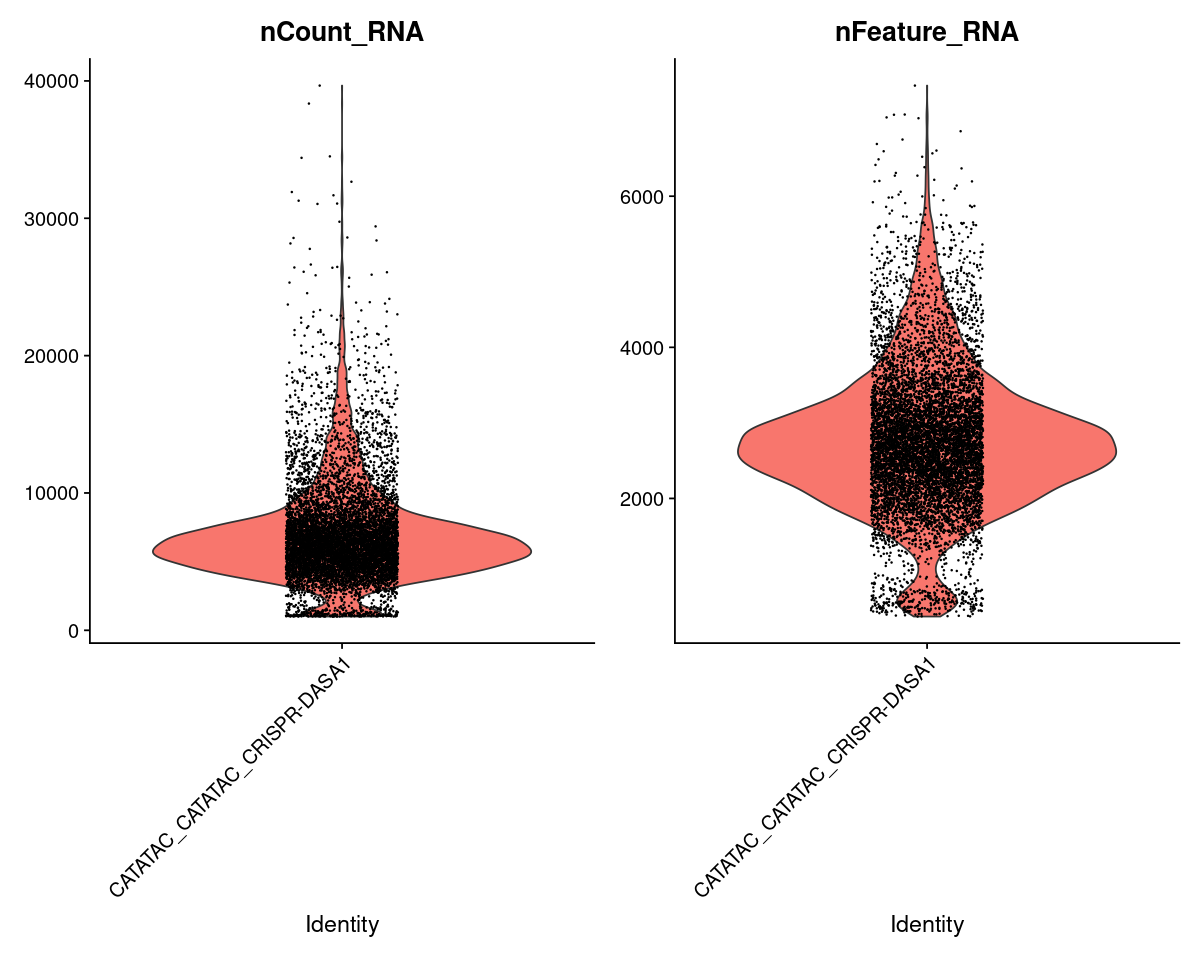

In [10]:
options(repr.plot.width=10, repr.plot.height=8)
VlnPlot(
    seurat_w_doublet_scores, 
    features = c('nCount_RNA', 'nFeature_RNA'),
    split.by = 'predicted_doublets'
)

In [11]:
head(seurat_w_doublet_scores)

nCount_ATAC nFeature_ATAC nCount_RNA nFeature_RNA
AAACAGCCAGTTTGTG-1 22409        9979          7540      3175        
AAACAGCCATGGCCCA-1 14982        6392         10192      3556        
AAACAGCCATTCCTCG-1  7542        3513          3789      1724        
AAACATGCAAACCTTG-1 16273        7265          6949      3129        
AAACATGCACAACAGG-1 19204        8550          9488      3584        
AAACATGCACAGACTC-1 12215        5748          4951      2260        
AAACATGCACTATGGC-1 12073        5609          4754      2181        
AAACATGCACTCAACA-1 17500        7873          7059      3032        
AAACATGCAGGAACAT-1 19412        8474          5137      2070        
AAACATGCATTAAGCT-1 25974       10979         11592      3911        
                   orig.ident                   percent.mt nucleosome_signal
AAACAGCCAGTTTGTG-1 CATATAC_CATATAC_CRISPR-DASA1 11.830239  0.7354356        
AAACAGCCATGGCCCA-1 CATATAC_CATATAC_CRISPR-DASA1 10.645604  0.5352518        
AAACAGCCATTCCTCG-1 CATATAC_CATATAC_CRISPR-DASA1 18.025864  0.4152299        
AAACATGCAAACCTTG-1 CATATAC_CATATAC_CRISPR-DASA1  6.662829  0.6931649        
AAACATGCACAACAGG-1 CATATAC_CATATAC_CRISPR-DASA1 16.768550  0.7171779        
AAACATGCACAGACTC-1 CATATAC_CATATAC_CRISPR-DASA1 11.129065  0.7271835        
AAACATGCACTATGGC-1 CATATAC_CATATAC_CRISPR-DASA1 16.933109  0.6658228        
AAACATGCACTCAACA-1 CATATAC_CATATAC_CRISPR-DASA1  8.683950  0.6758922        
AAACATGCAGGAACAT-1 CATATAC_CATATAC_CRISPR-DASA1 19.817014  0.5876028        
AAACATGCATTAAGCT-1 CATATAC_CATATAC_CRISPR-DASA1 19.729124  0.7521048        
                   nucleosome_percentile TSS.enrichment TSS.percentile
AAACAGCCAGTTTGTG-1 0.73                  4.713596       0.12          
AAACAGCCATGGCCCA-1 0.12                  5.708814       0.74          
AAACAGCCATTCCTCG-1 0.00                  5.845064       0.80          
AAACATGCAAACCTTG-1 0.59                  5.870112       0.81          
AAACATGCACAACAGG-1 0.68                  5.310905       0.49          
AAACATGCACAGACTC-1 0.71                  5.507487       0.63          
AAACATGCACTATGGC-1 0.48                  5.059834       0.32          
AAACATGCACTCAACA-1 0.52                  5.357577       0.52          
AAACATGCAGGAACAT-1 0.22                  5.843796       0.80          
AAACATGCATTAAGCT-1 0.78                  4.690961       0.11          
                   nCount_SCT nFeature_SCT predicted_doublets doublet_scores
AAACAGCCAGTTTGTG-1 6956       3175         0                  0             
AAACAGCCATGGCCCA-1 7135       3459         0                  0             
AAACAGCCATTCCTCG-1 5560       1735         0                  0             
AAACATGCAAACCTTG-1 6749       3128         0                  0             
AAACATGCACAACAGG-1 7153       3516         0                  0             
AAACATGCACAGACTC-1 5656       2260         0                  0             
AAACATGCACTATGGC-1 5601       2181         0                  0             
AAACATGCACTCAACA-1 6794       3031         0                  0             
AAACATGCAGGAACAT-1 5748       2068         0                  0             
AAACATGCATTAAGCT-1 7201       3499         0                  0

Warning message in FeaturePlot(seurat_w_doublet_scores, features = "doublet_scores", :
"All cells have the same value (0) of doublet_scores."


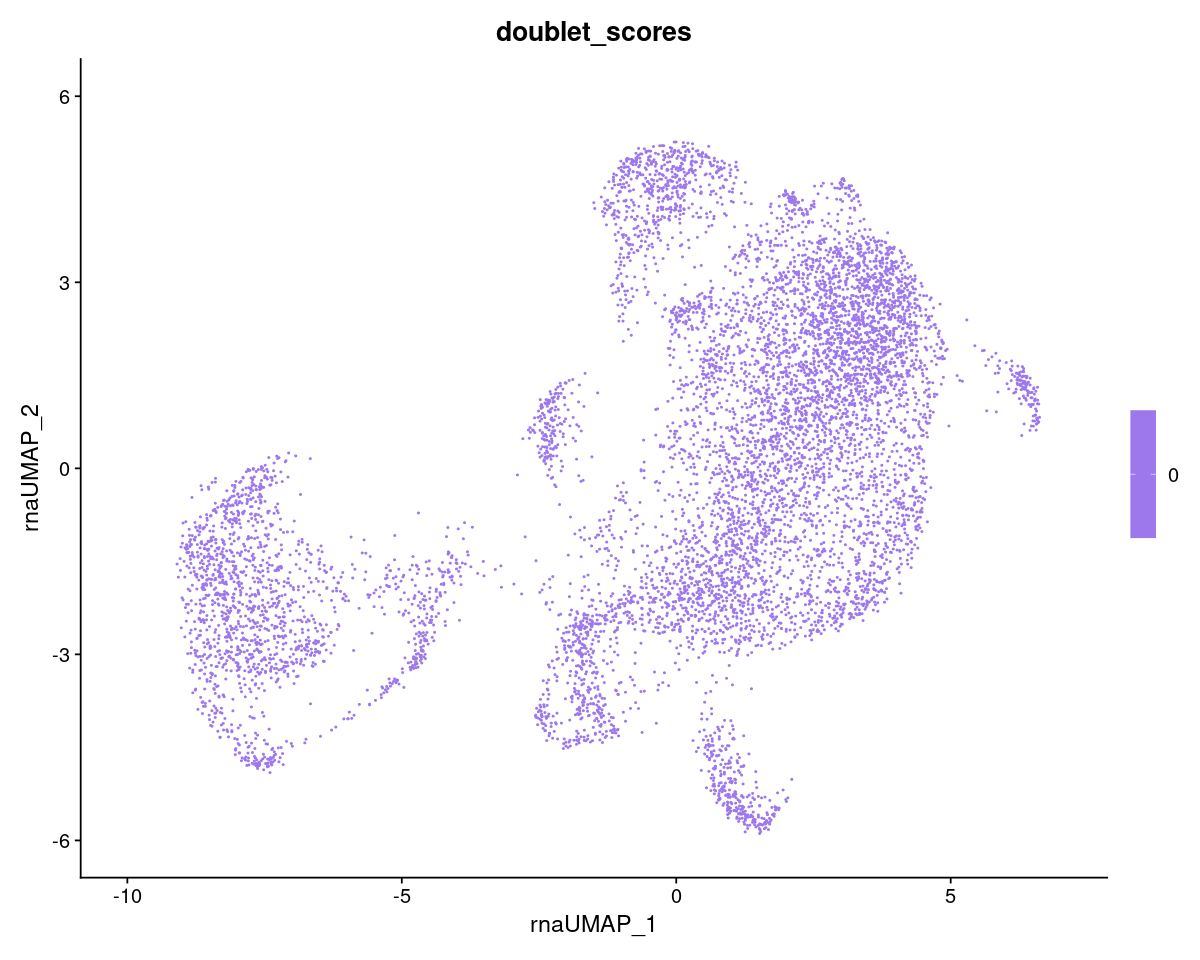

In [12]:
FeaturePlot(
    seurat_w_doublet_scores, 
    features = 'doublet_scores', 
    min.cutoff = "q99", 
    reduction = 'umap.rna'
) 

## Check if clustering is driven by UMI counts (not relevant for CKD)

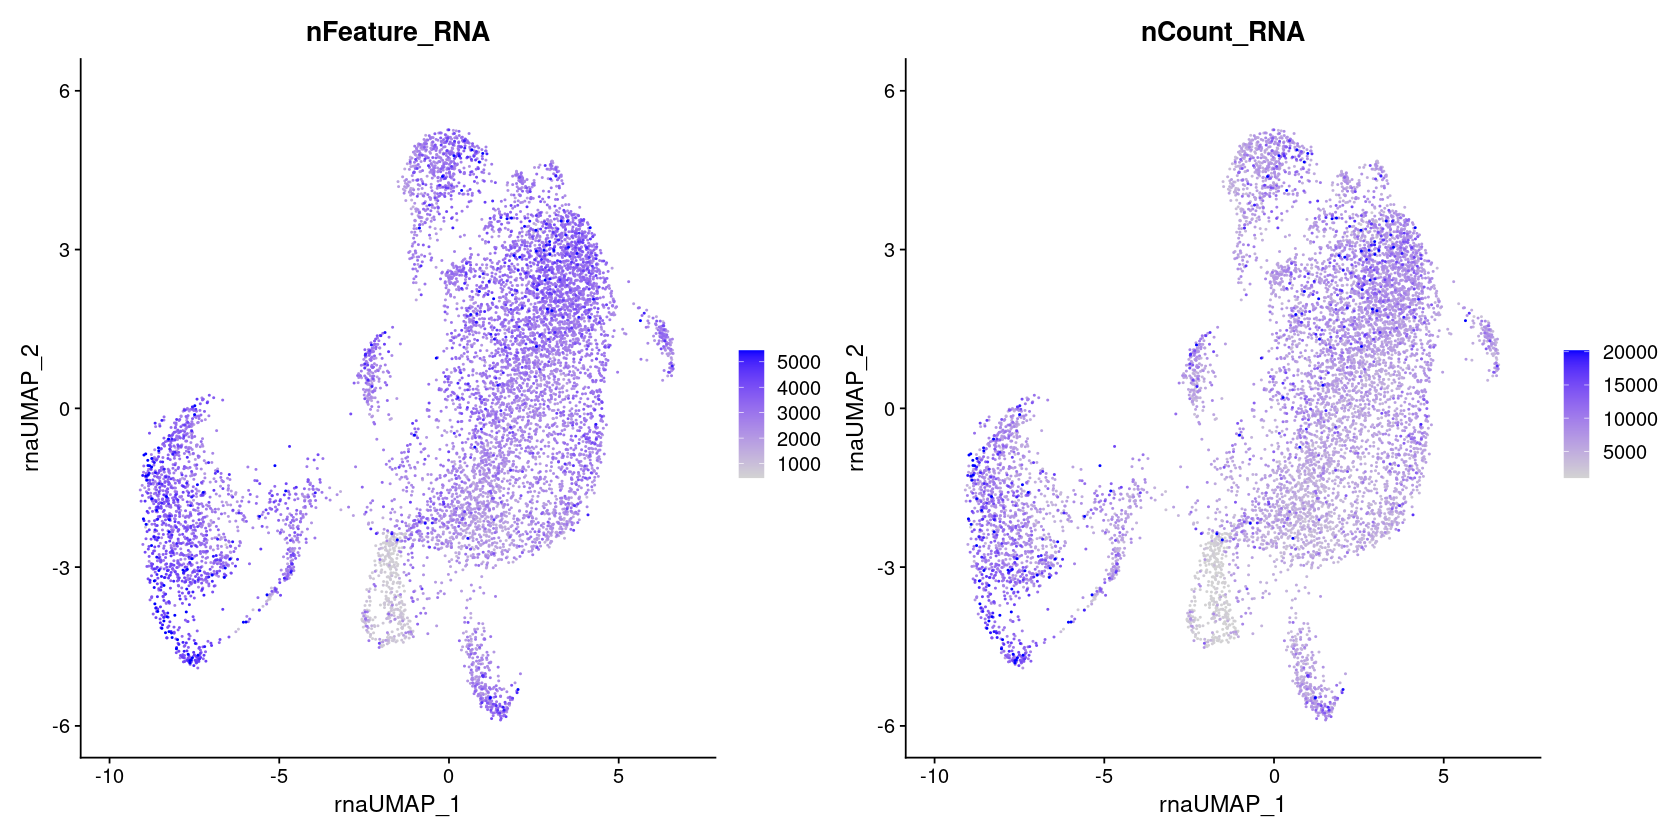

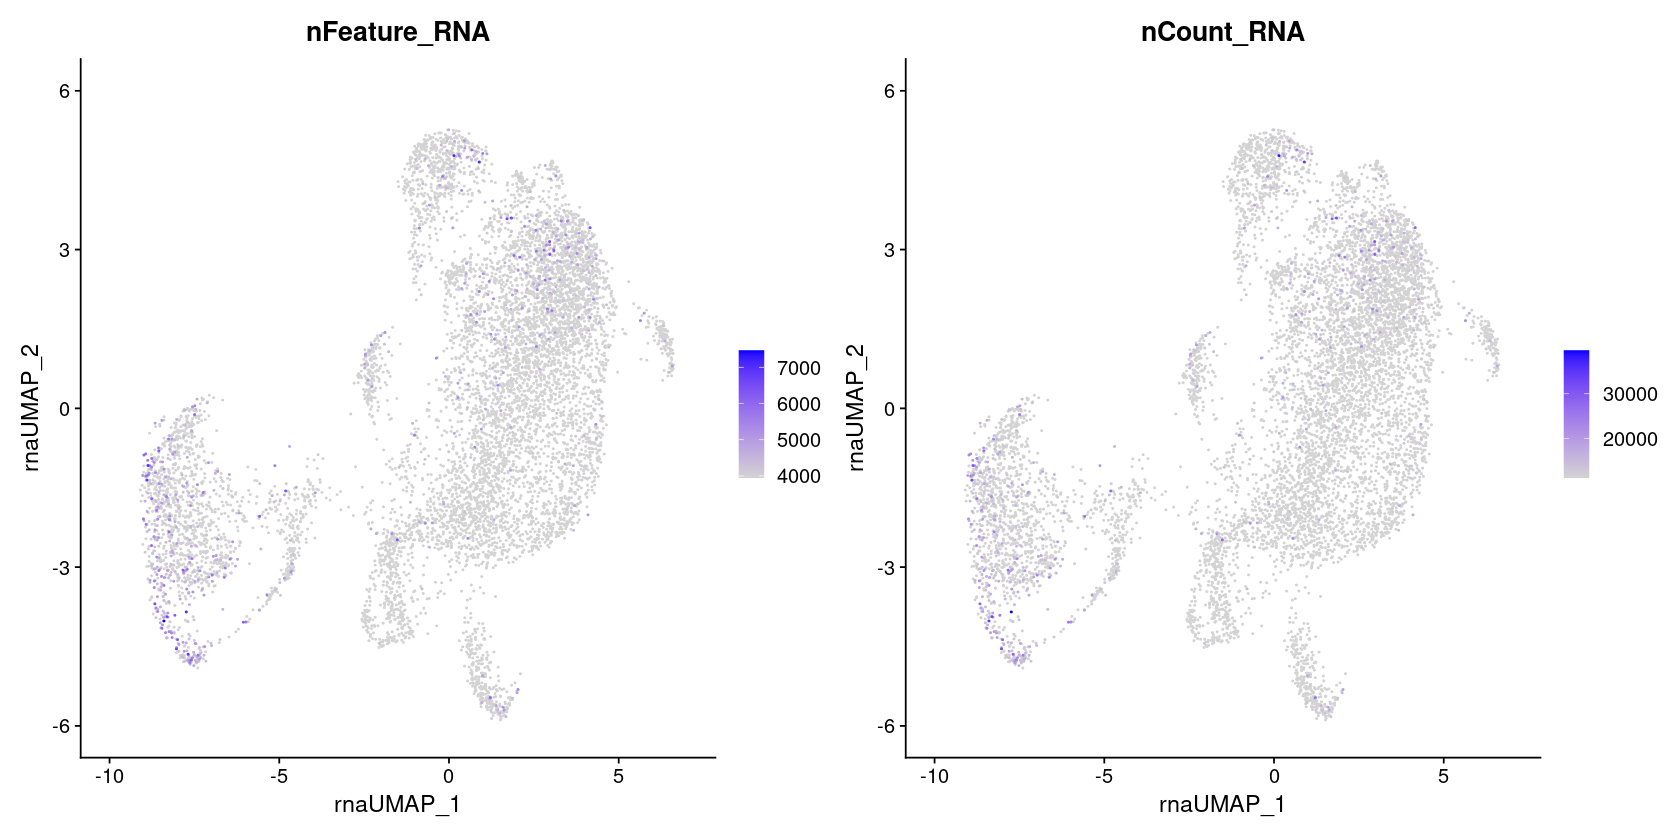

In [13]:
options(repr.plot.width=14, repr.plot.height=7)
FeaturePlot(
    seurat_w_doublet_scores, 
    reduction= "umap.rna", 
    features = c("nFeature_RNA", "nCount_RNA"), 
    min.cutoff = NA, 
    max.cutoff = "q99", 
    ncol = 2, 
    order=T
)
FeaturePlot(
    seurat_w_doublet_scores, 
    reduction= "umap.rna", 
    features = c("nFeature_RNA", "nCount_RNA"), 
    min.cutoff = "q90", 
    max.cutoff = NA, 
    ncol = 2, 
    order=T
)

In [14]:
corr_list <- apply(
                    as.data.frame(seurat_w_doublet_scores@reductions$pca@cell.embeddings), 2, 
                    function(x) cor.test(x, seurat_w_doublet_scores$nCount_RNA, method="pearson")$estimate
            )

df_corrs <- as.data.frame(corr_list)
colnames(df_corrs) <- c("pearson_r")
df_corrs$PC <- rownames(df_corrs)
df_corrs$PC <- factor(df_corrs$PC, levels = df_corrs$PC)

# x = as.data.frame(seurat_w_doublet_scores@reductions$pca@cell.embeddings)$PC_1
# y = seurat_w_doublet_scores$nCount_RNA
# cor.test(x, y, method="pearson")

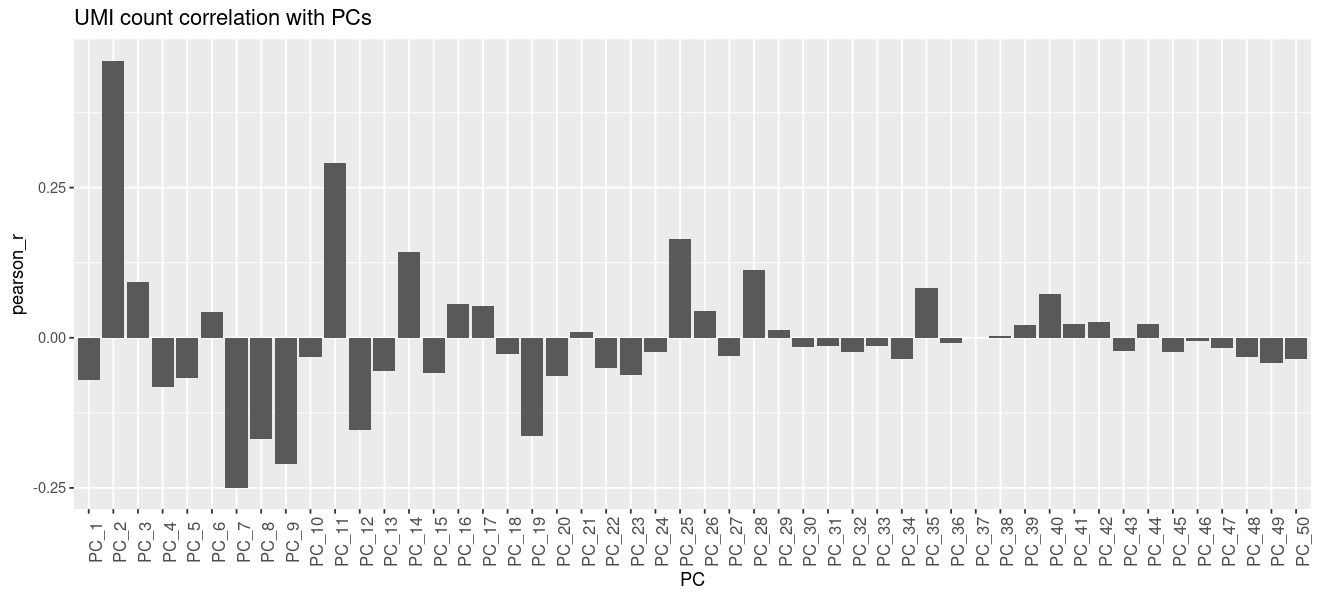

In [15]:
options(repr.plot.width=11, repr.plot.height=5)
ggplot(df_corrs, aes(x=PC, y=pearson_r)) +
    geom_bar(stat = "identity") +
    theme(axis.text.x = element_text(angle = 90, size = 10)) +
    labs(title = "UMI count correlation with PCs")
    

## Check if mito reads are driving the clustering

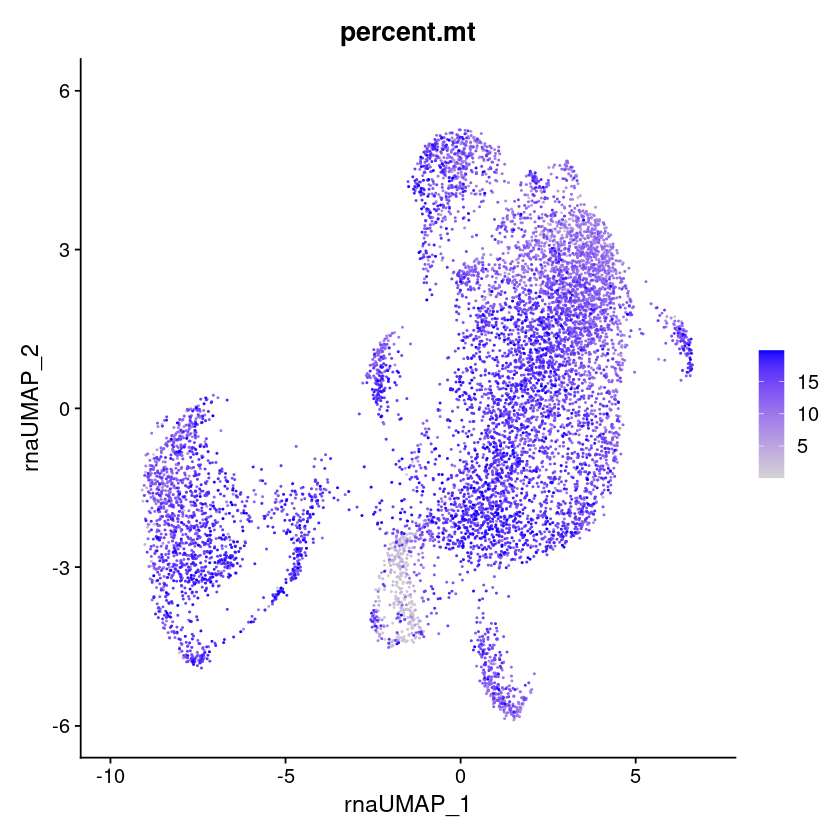

In [16]:
options(repr.plot.width=7, repr.plot.height=7)
FeaturePlot(seurat_w_doublet_scores, reduction= "umap.rna", features = c("percent.mt"), min.cutoff = NA, max.cutoff = "q99", order=T)

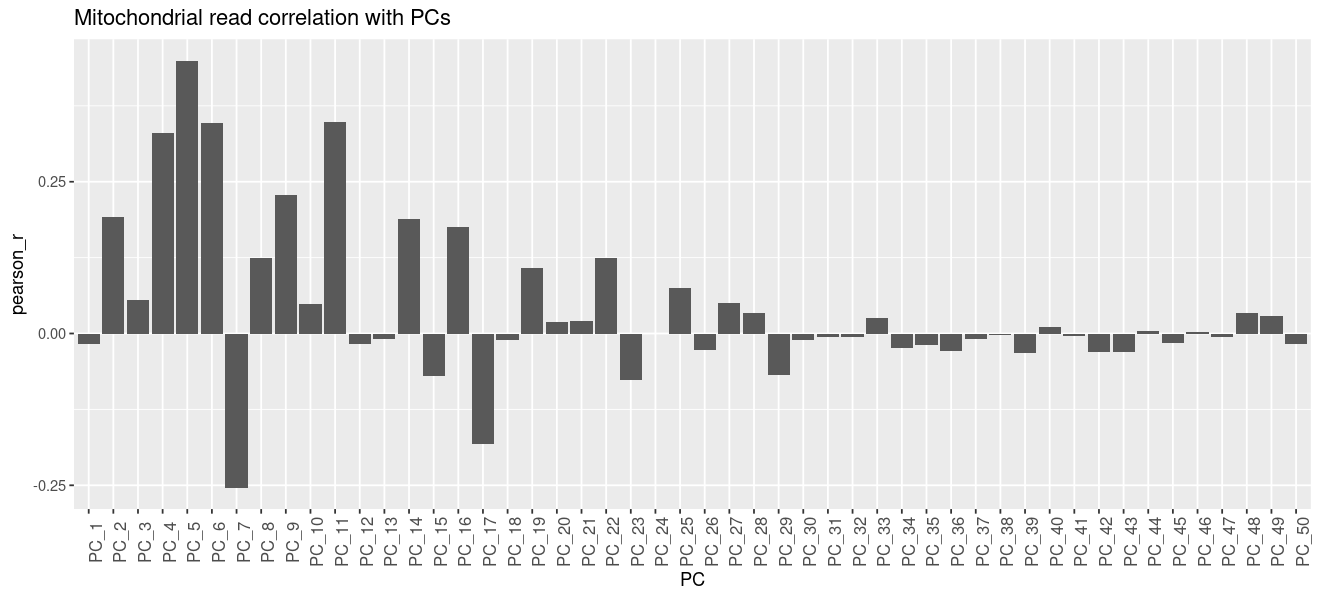

In [17]:
corr_list <- apply(
                    as.data.frame(seurat_w_doublet_scores@reductions$pca@cell.embeddings), 2, 
                    function(x) cor.test(x, seurat_w_doublet_scores$percent.mt, method="pearson")$estimate
            )

df_corrs <- as.data.frame(corr_list)
colnames(df_corrs) <- c("pearson_r")
df_corrs$PC <- rownames(df_corrs)
df_corrs$PC <- factor(df_corrs$PC, levels = df_corrs$PC)

# x = as.data.frame(seurat_w_doublet_scores@reductions$pca@cell.embeddings)$PC_1
# y = seurat_w_doublet_scores$percent.mt
# cor.test(x, y, method="pearson")

options(repr.plot.width=11, repr.plot.height=5)
ggplot(df_corrs, aes(x=PC, y=pearson_r)) +
    geom_bar(stat = "identity") +
    theme(axis.text.x = element_text(angle = 90, size = 10)) +
    labs(title = "Mitochondrial read correlation with PCs")
    

# Filter out multiplets

In [18]:
#select_singlets = seurat_w_doublet_scores$predicted_doublets == 0
seurat <- subset(seurat_w_doublet_scores, predicted_doublets == 0)

In [19]:
nrow(seurat@meta.data)
nrow(seurat_w_doublet_scores@meta.data)

[1] 8520

[1] 8520

# SVD

In [20]:
DefaultAssay(seurat) <- "ATAC"
seurat <- RunTFIDF(seurat)

Performing TF-IDF normalization



In [21]:
seurat <- FindTopFeatures(seurat, min.cutoff = 'q0')

In [22]:
seurat <- RunSVD(seurat)

Running SVD



Scaling cell embeddings



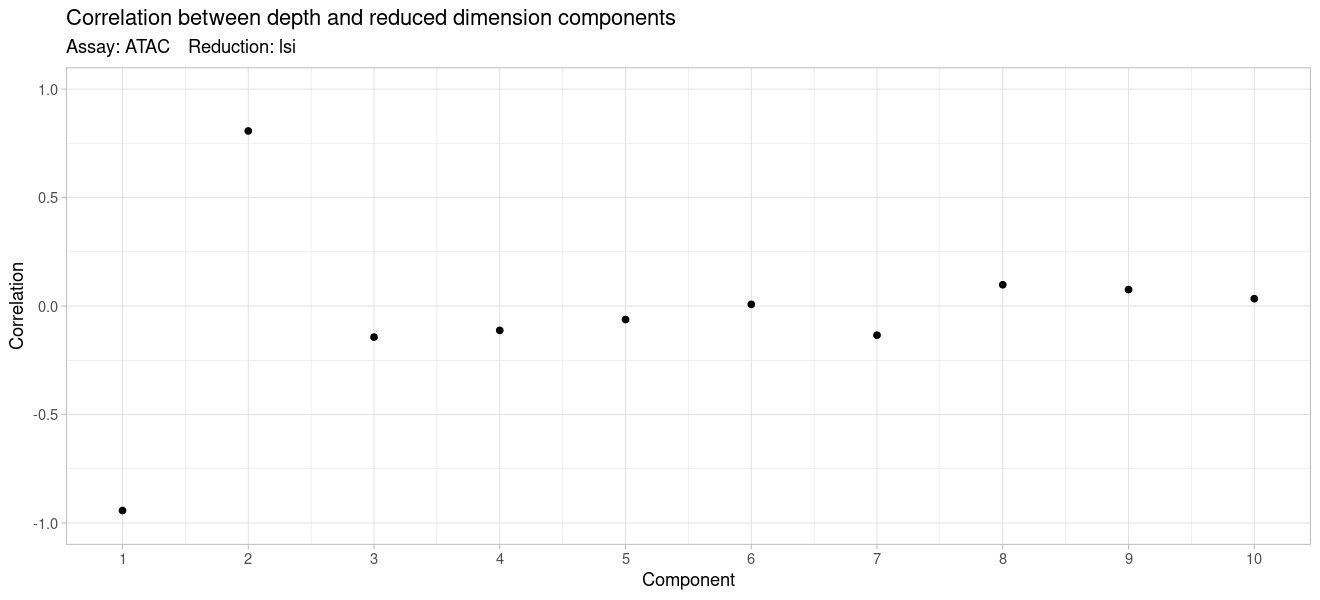

In [23]:
DepthCor(seurat)

In [24]:
# We exclude the first dimension as this is typically correlated with sequencing depth
seurat <- RunUMAP(seurat, reduction = 'lsi', dims = 2:50, reduction.name = "umap.atac", reduction.key = "atacUMAP_")

Warning message:
"The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session"


14:25:09 UMAP embedding parameters a = 0.9922 b = 1.112



14:25:09 Read 8520 rows and found 49 numeric columns



14:25:09 Using Annoy for neighbor search, n_neighbors = 30



14:25:09 Building Annoy index with metric = cosine, n_trees = 50



0%   10   20   30   40   50   60   70   80   90   100%



[----|----|----|----|----|----|----|----|----|----|



*


*


*


*


*


*


*


*


*


*


*


*


*


*


*


*


*


*


*


*


*


*


*


*


*


*


*


*


*


*


*


*


*


*


*


*


*


*


*


*


*


*


*


*


*


*


*


*


*


*


|



14:25:11 Writing NN index file to temp file /tmp/RtmpMjIwGq/file3e5256657ade3



14:25:11 Searching Annoy index using 1 thread, search_k = 3000



14:25:14 Annoy recall = 100%



14:25:15 Commencing smooth kNN distance calibration using 1 thread


 with target n_neighbors = 30



14:25:17 Initializing from normalized Laplacian + noise (using irlba)



14:25:17 Commencing optimization for 500 epochs, with 353516 positive edges



14:25:26 Optimization finished



In [25]:
options(repr.plot.width=10, repr.plot.height=10)
seurat <- FindNeighbors(object = seurat, reduction = 'lsi', dims = 2:30)
seurat <- FindClusters(object = seurat, verbose = FALSE, algorithm = 3)

Computing nearest neighbor graph



Computing SNN



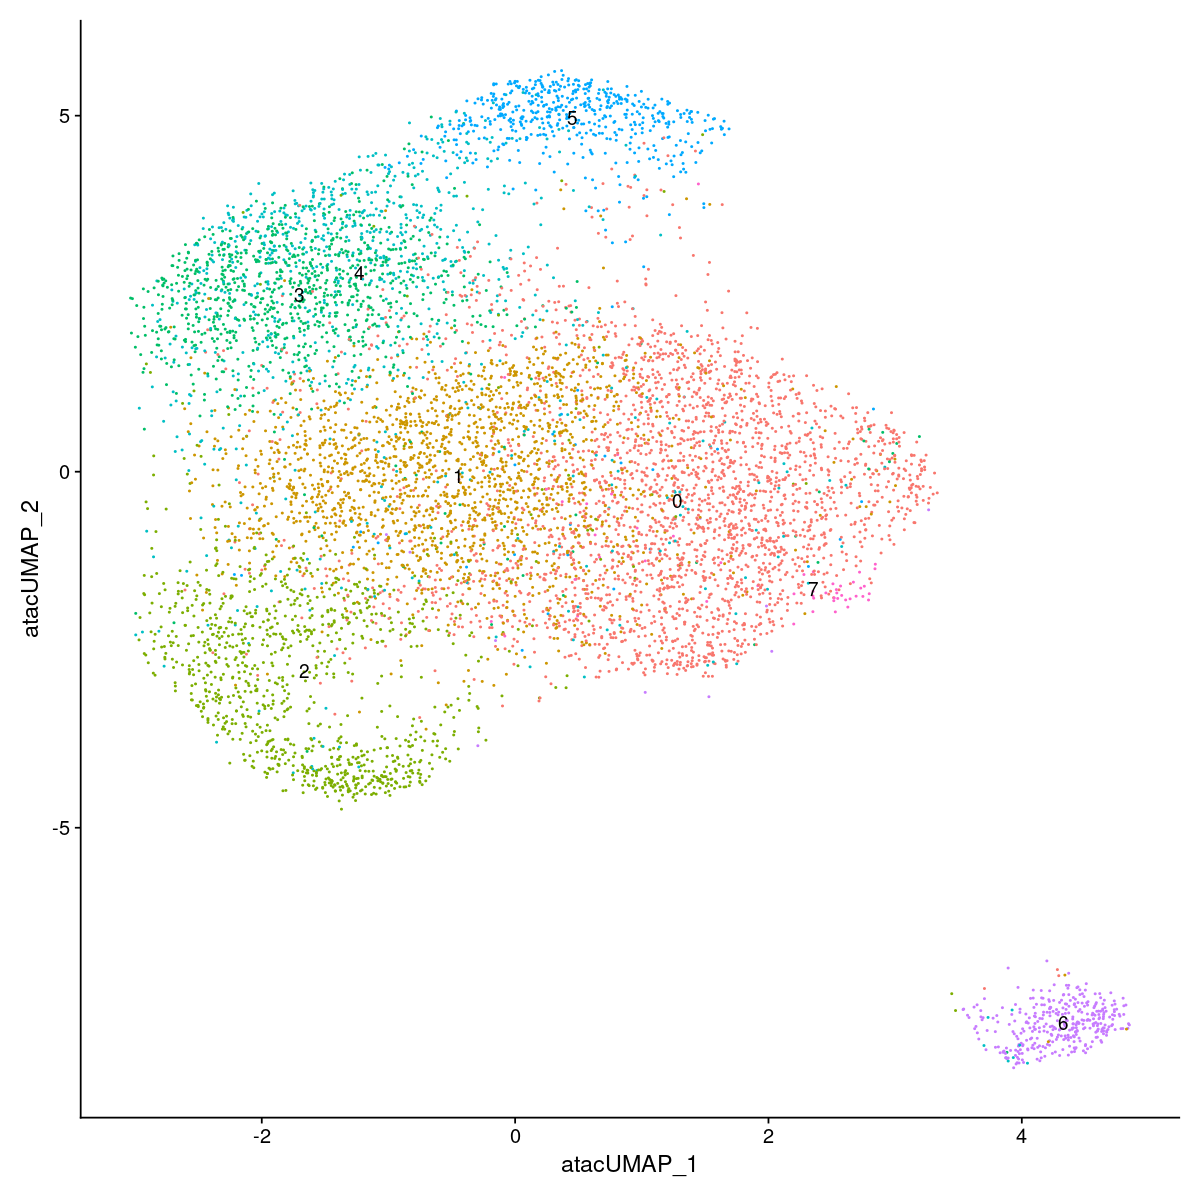

In [26]:
DimPlot(object = seurat, label = TRUE) + NoLegend()

# RNA+ATAC Joint analysis 

In [27]:
seurat <- FindMultiModalNeighbors(seurat, reduction.list = list("pca", "lsi"), dims.list = list(1:50, 2:50))
seurat <- RunUMAP(seurat, nn.name = "weighted.nn", reduction.name = "wnn.umap", reduction.key = "wnnUMAP_")
seurat <- FindClusters(seurat, graph.name = "wsnn", algorithm = 3, verbose = FALSE)

Calculating cell-specific modality weights



Finding 20 nearest neighbors for each modality.



Calculating kernel bandwidths



Finding multimodal neighbors



Constructing multimodal KNN graph



Constructing multimodal SNN graph



14:25:56 UMAP embedding parameters a = 0.9922 b = 1.112



14:25:57 Commencing smooth kNN distance calibration using 1 thread


 with target n_neighbors = 20



14:25:59 Initializing from normalized Laplacian + noise (using irlba)



14:25:59 Commencing optimization for 500 epochs, with 272742 positive edges



14:26:09 Optimization finished



In [28]:
DefaultAssay(seurat) <- "SCT"
tf.list <- genes_to_plot
tf.list.2 <- c("NANOG", "POU5F1", "PODXL", "AC003975.1")
options(repr.plot.width=18, repr.plot.height=14)

Warning message in FetchData.Seurat(object = object, vars = c(dims, "ident", features), :
"The following requested variables were not found: NTC22, NTC28, NTC36, NTC74, NTC82, NTC98"


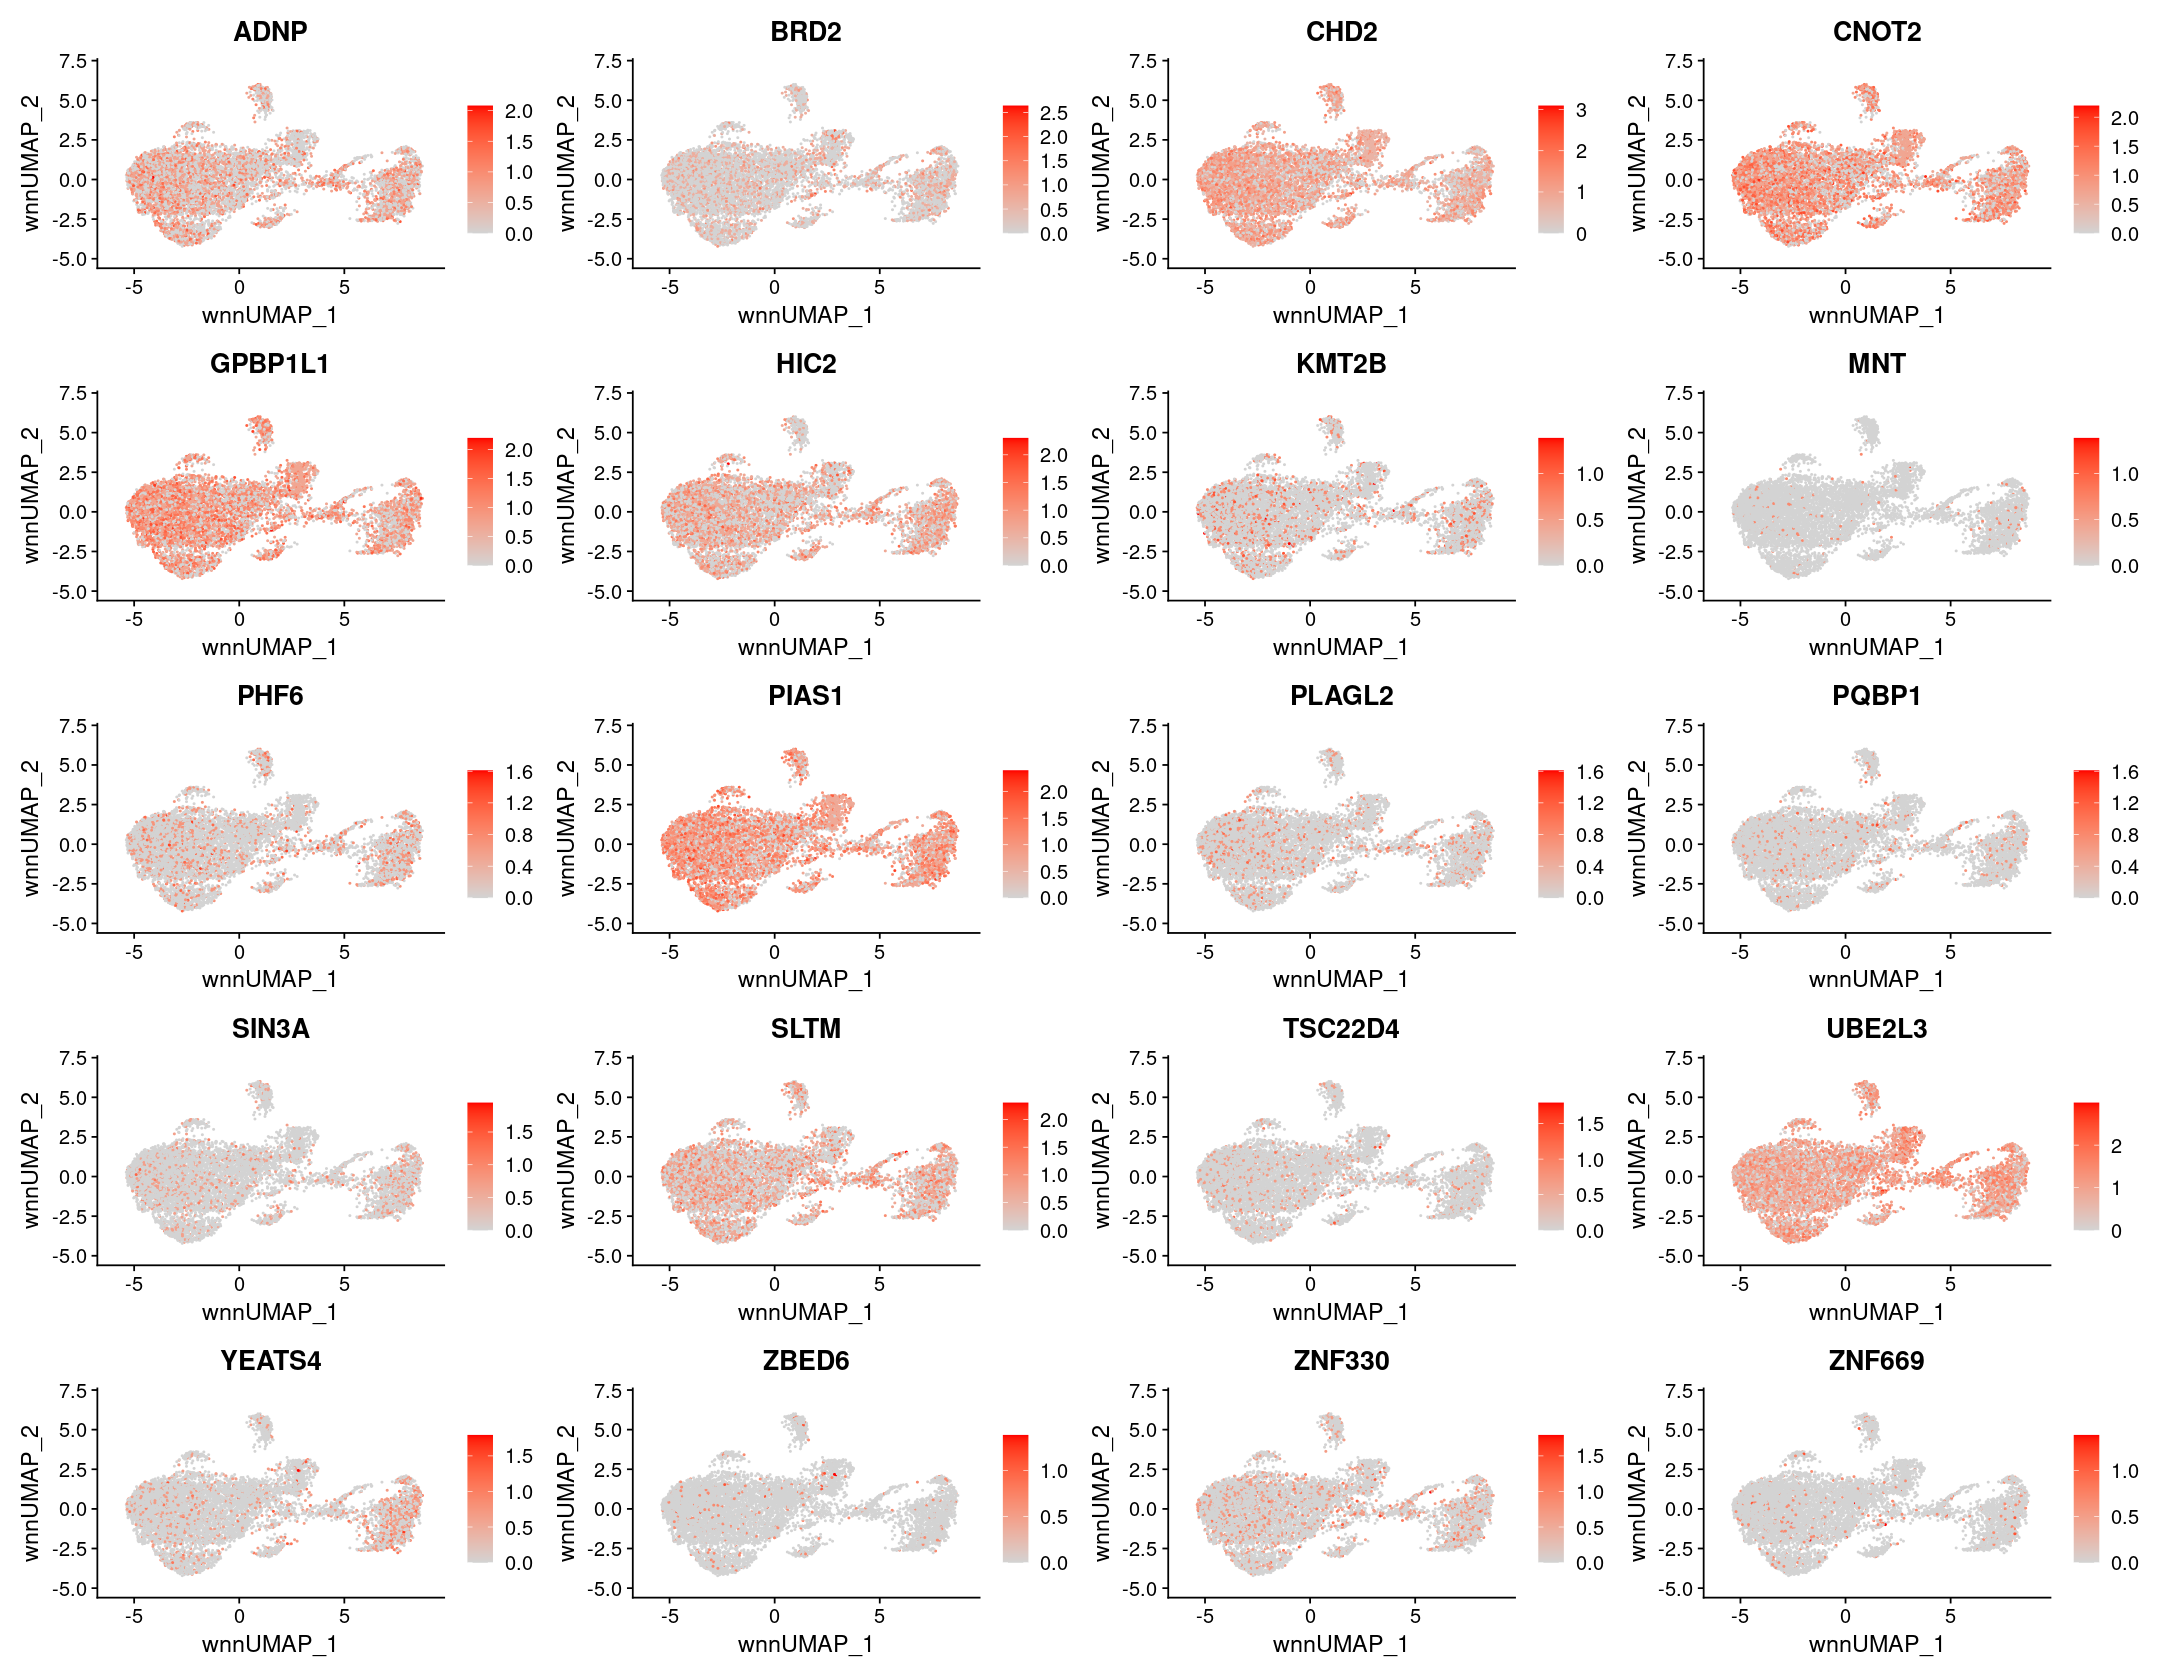

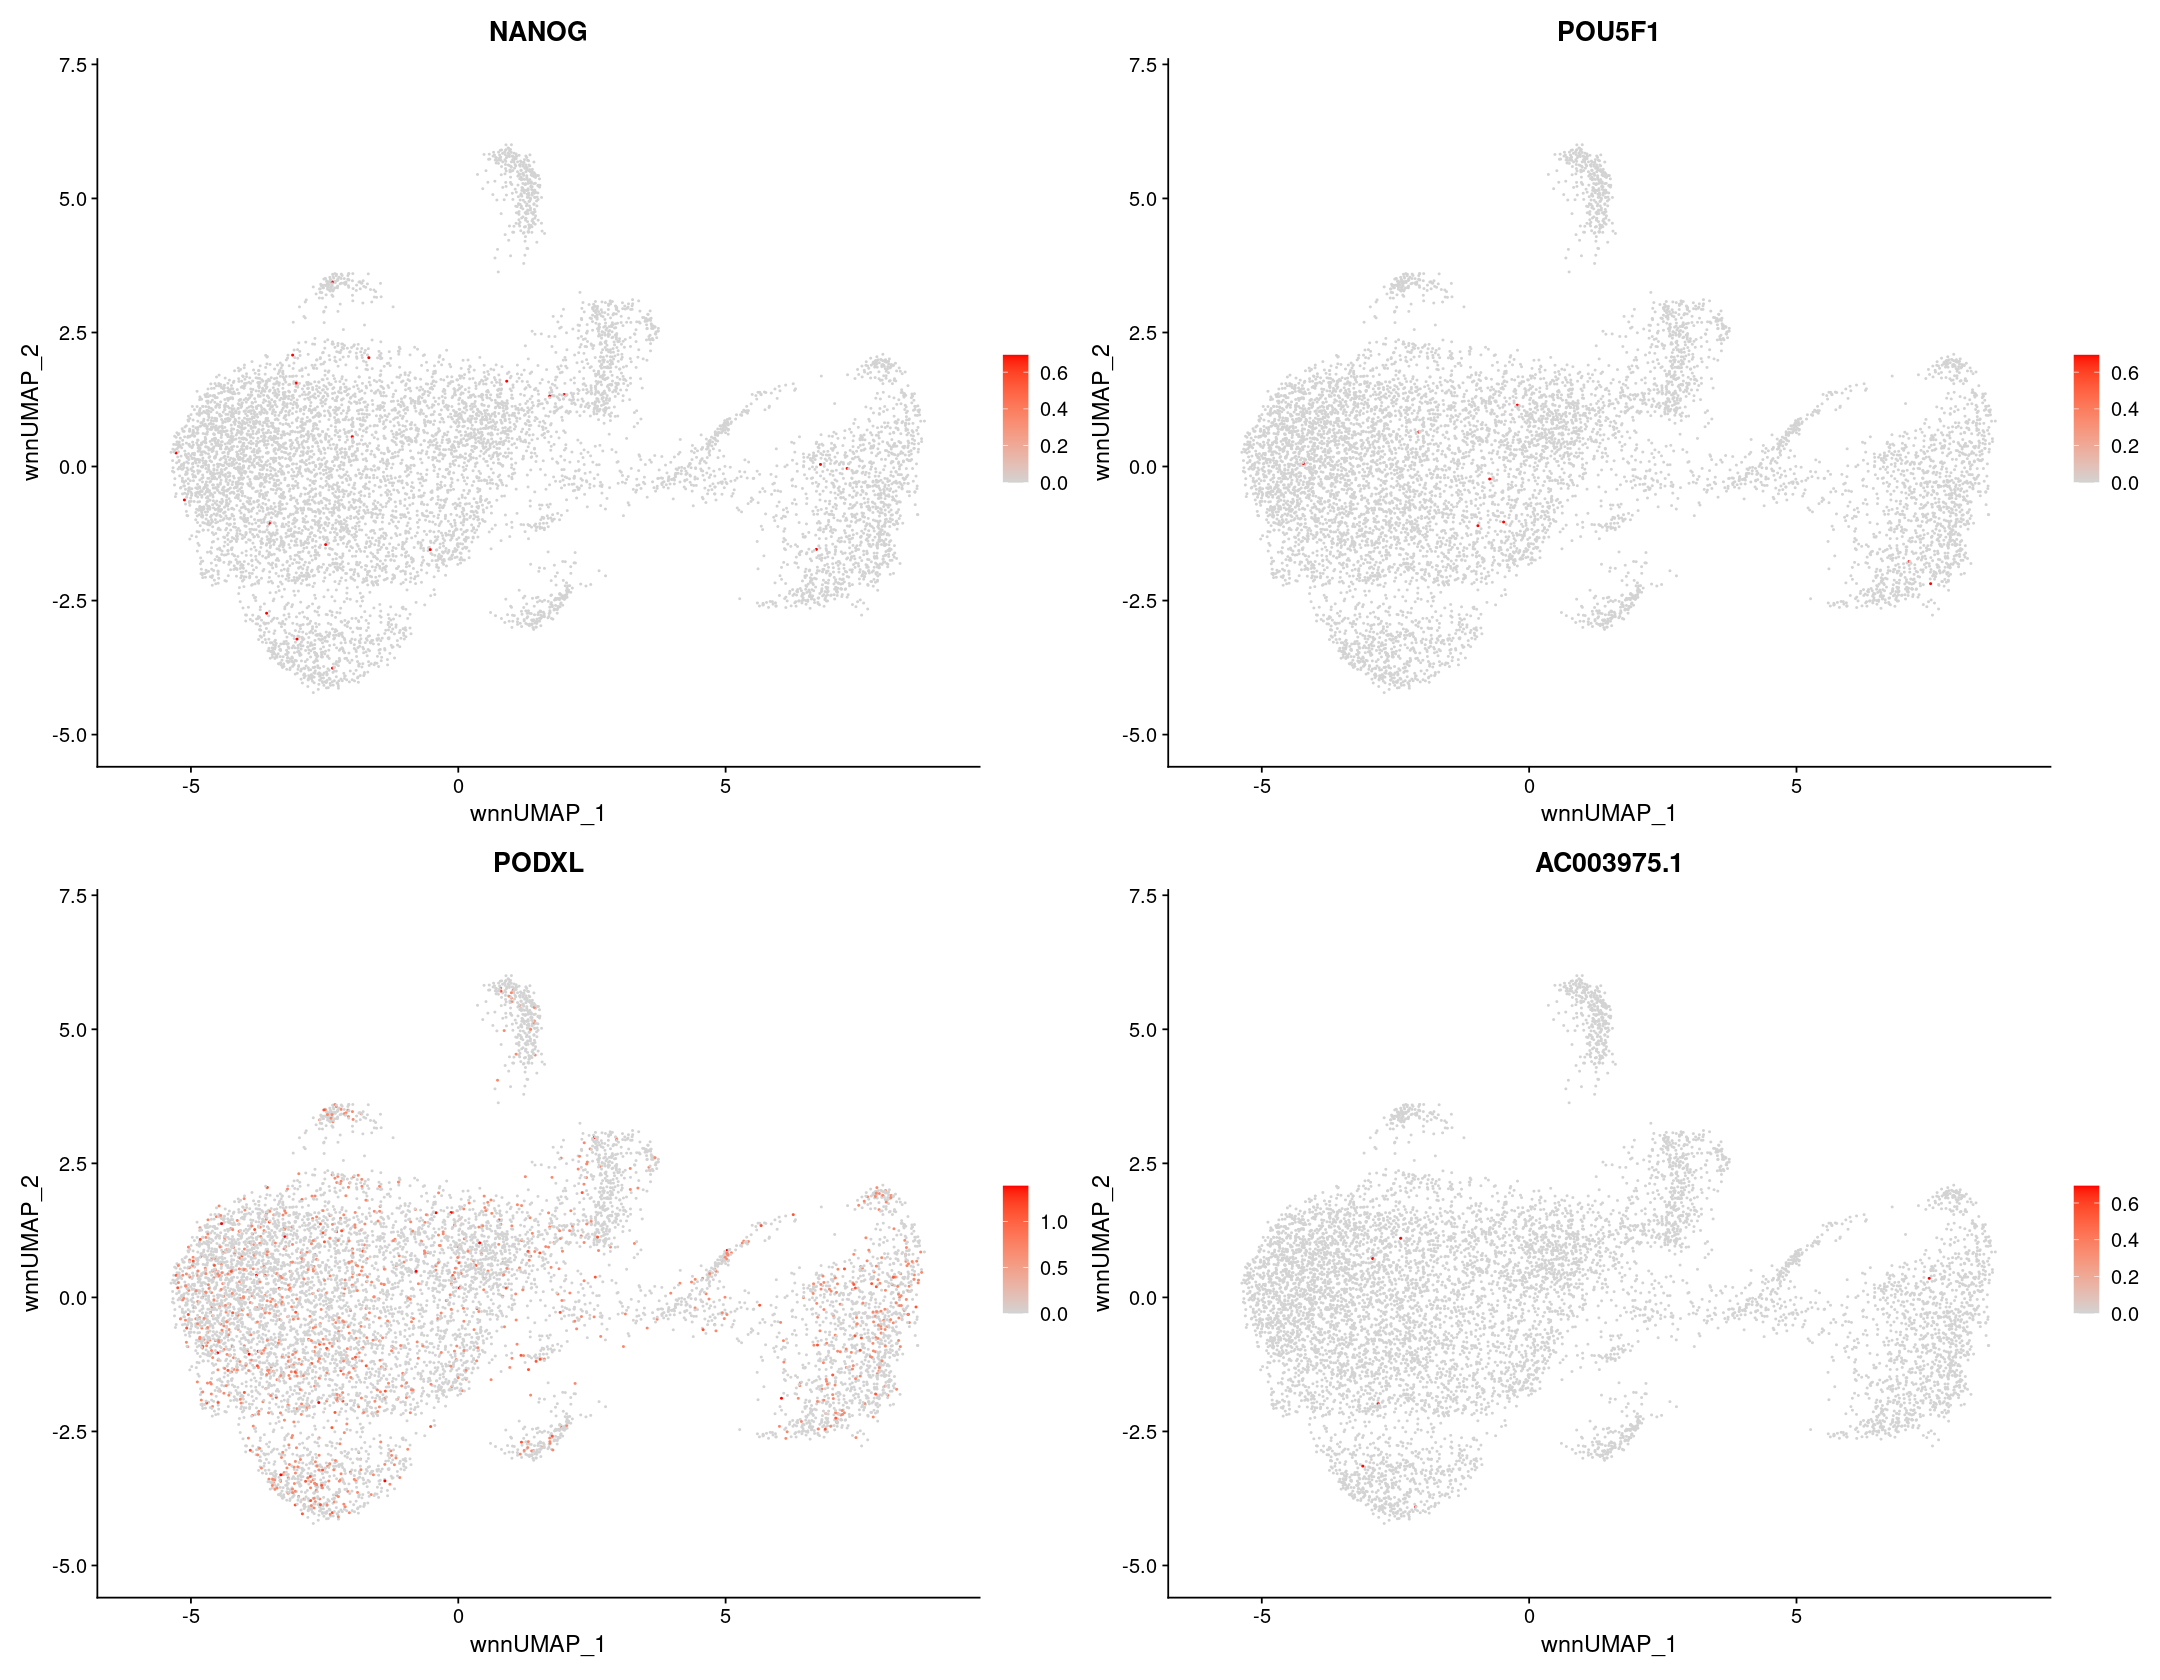

In [29]:
gene_plot <- FeaturePlot(seurat, features = tf.list, reduction = 'wnn.umap', cols = c("lightgrey", "red"))
gene_plot_2 <- FeaturePlot(seurat, features = tf.list.2, reduction = 'wnn.umap', cols = c("lightgrey", "red"))
gene_plot
gene_plot_2 

Warning message in FetchData.Seurat(object = object, vars = c(dims, "ident", features), :
"The following requested variables were not found: NTC22, NTC28, NTC36, NTC74, NTC82, NTC98"


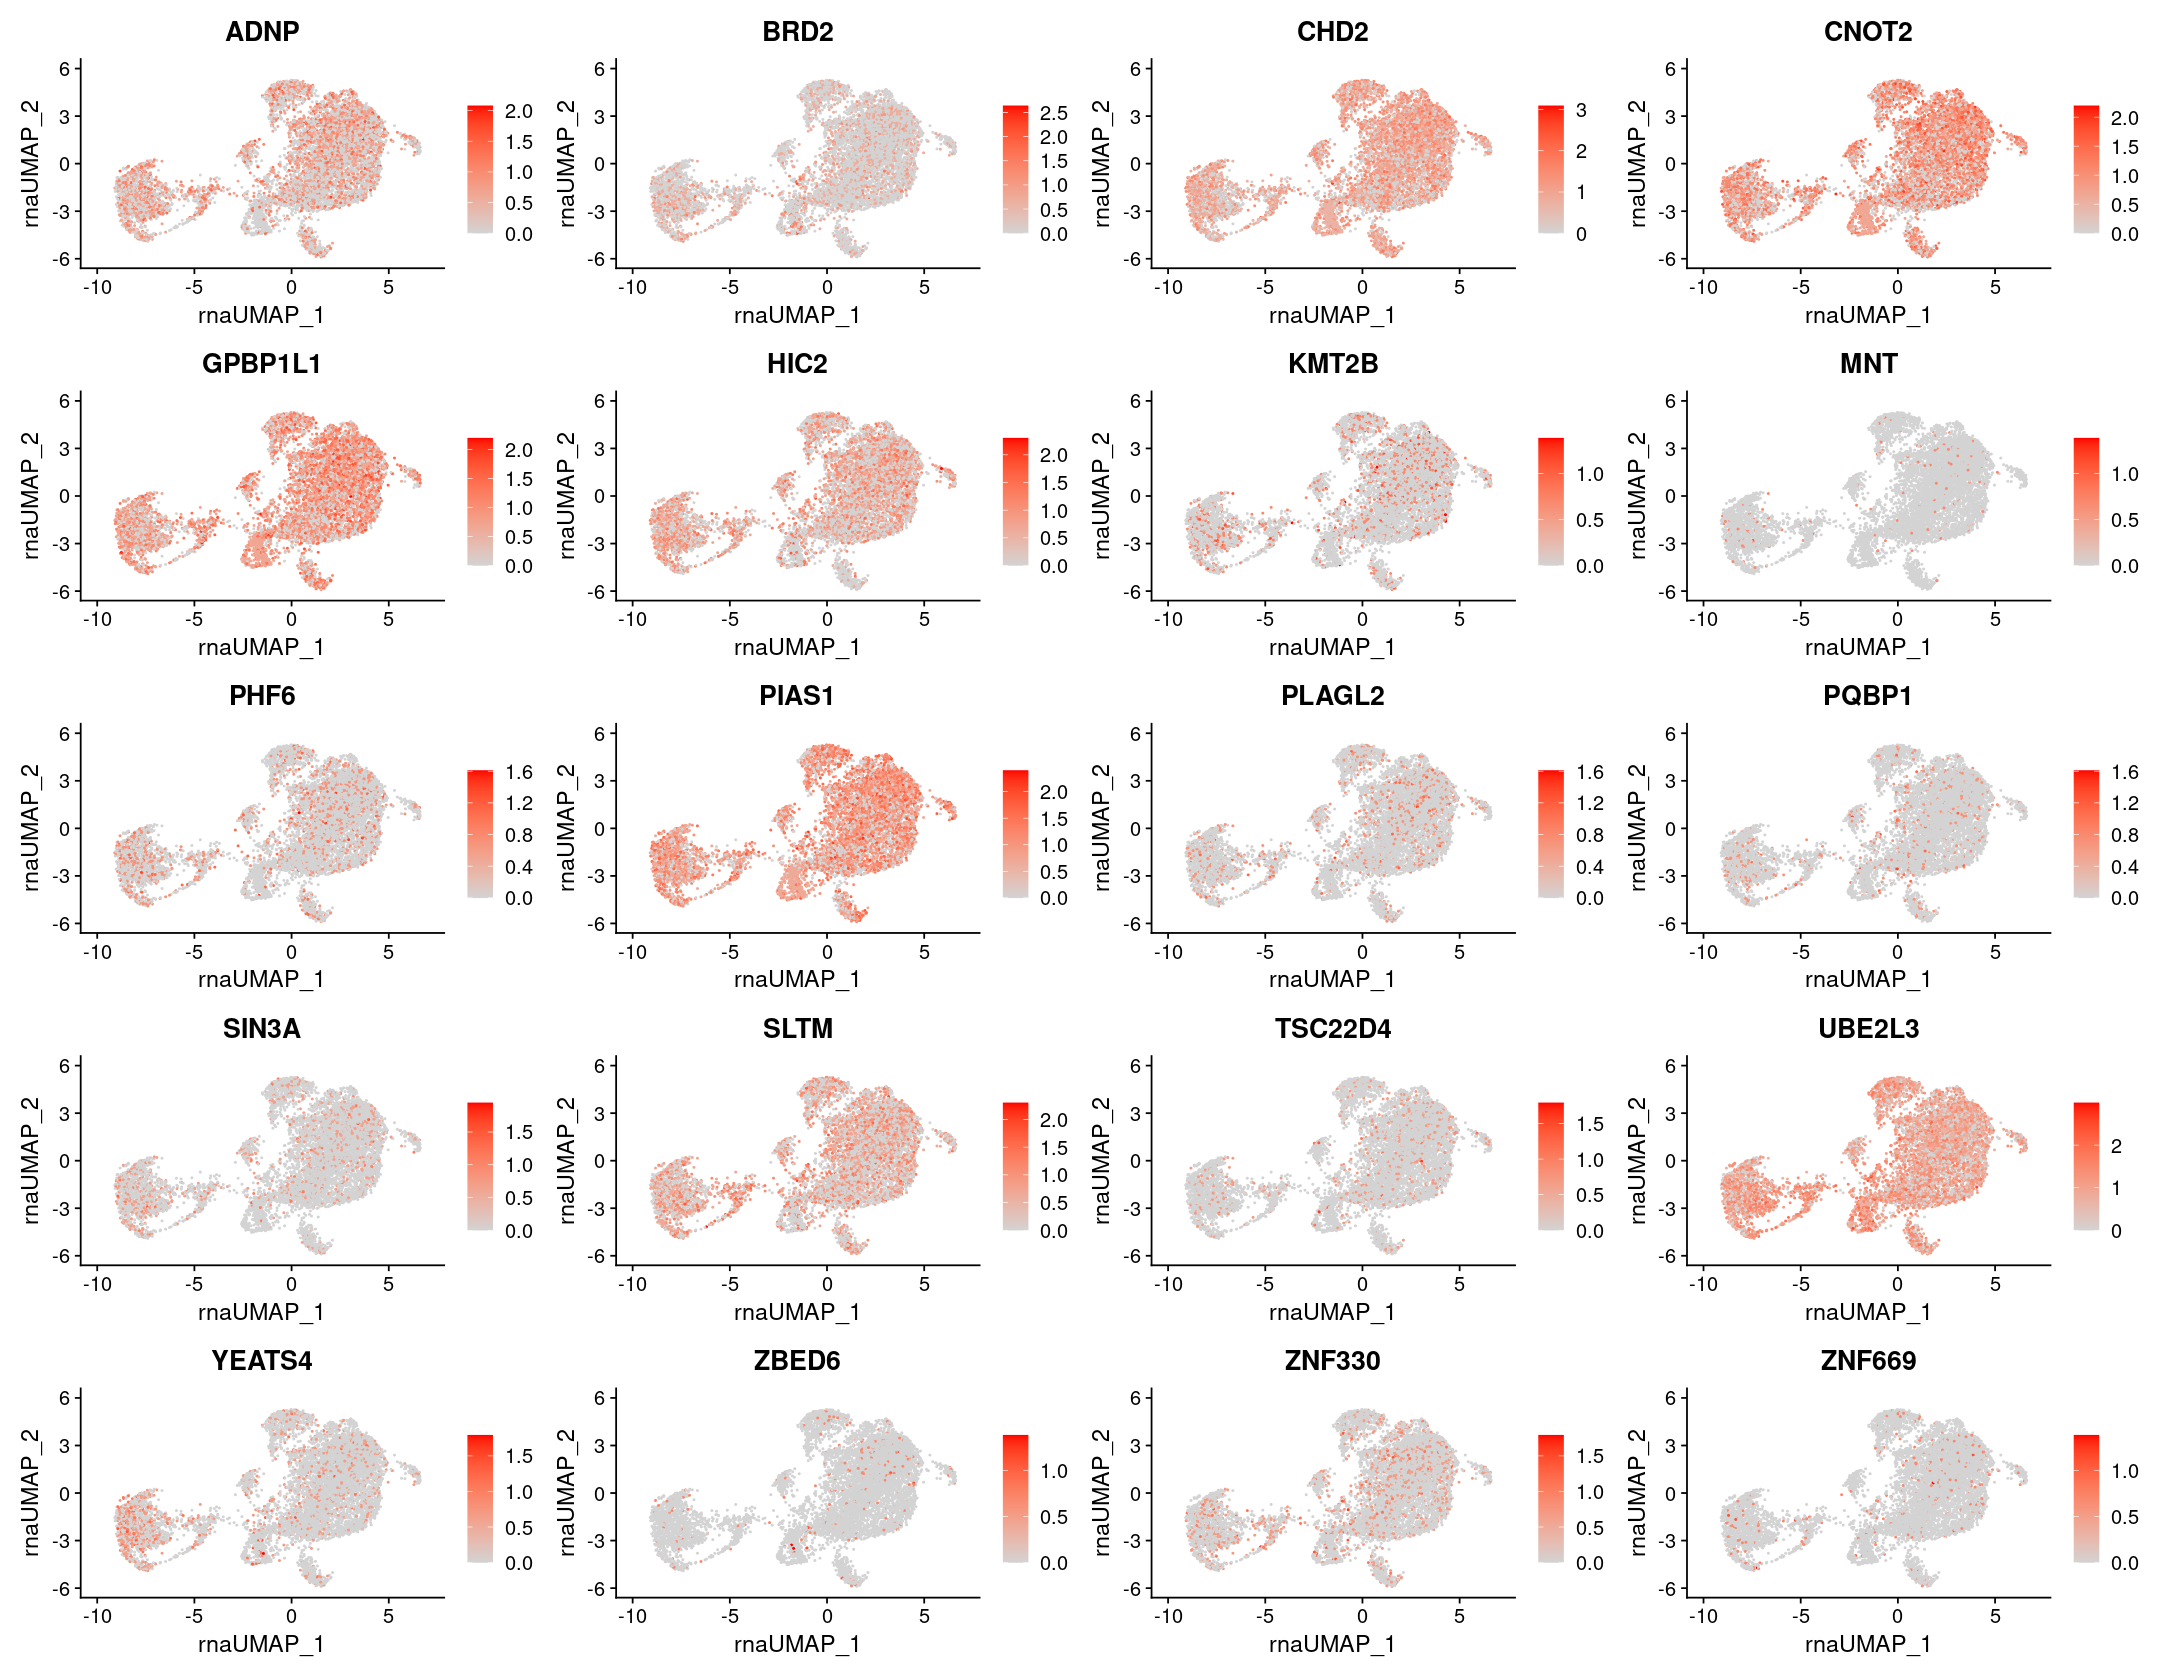

In [30]:
gene_plot <- FeaturePlot(seurat, features = tf.list, reduction = 'umap.rna', cols = c("lightgrey", "red"))
gene_plot 

Warning message in FetchData.Seurat(object = object, vars = c(dims, "ident", features), :
"The following requested variables were not found: NTC22, NTC28, NTC36, NTC74, NTC82, NTC98"


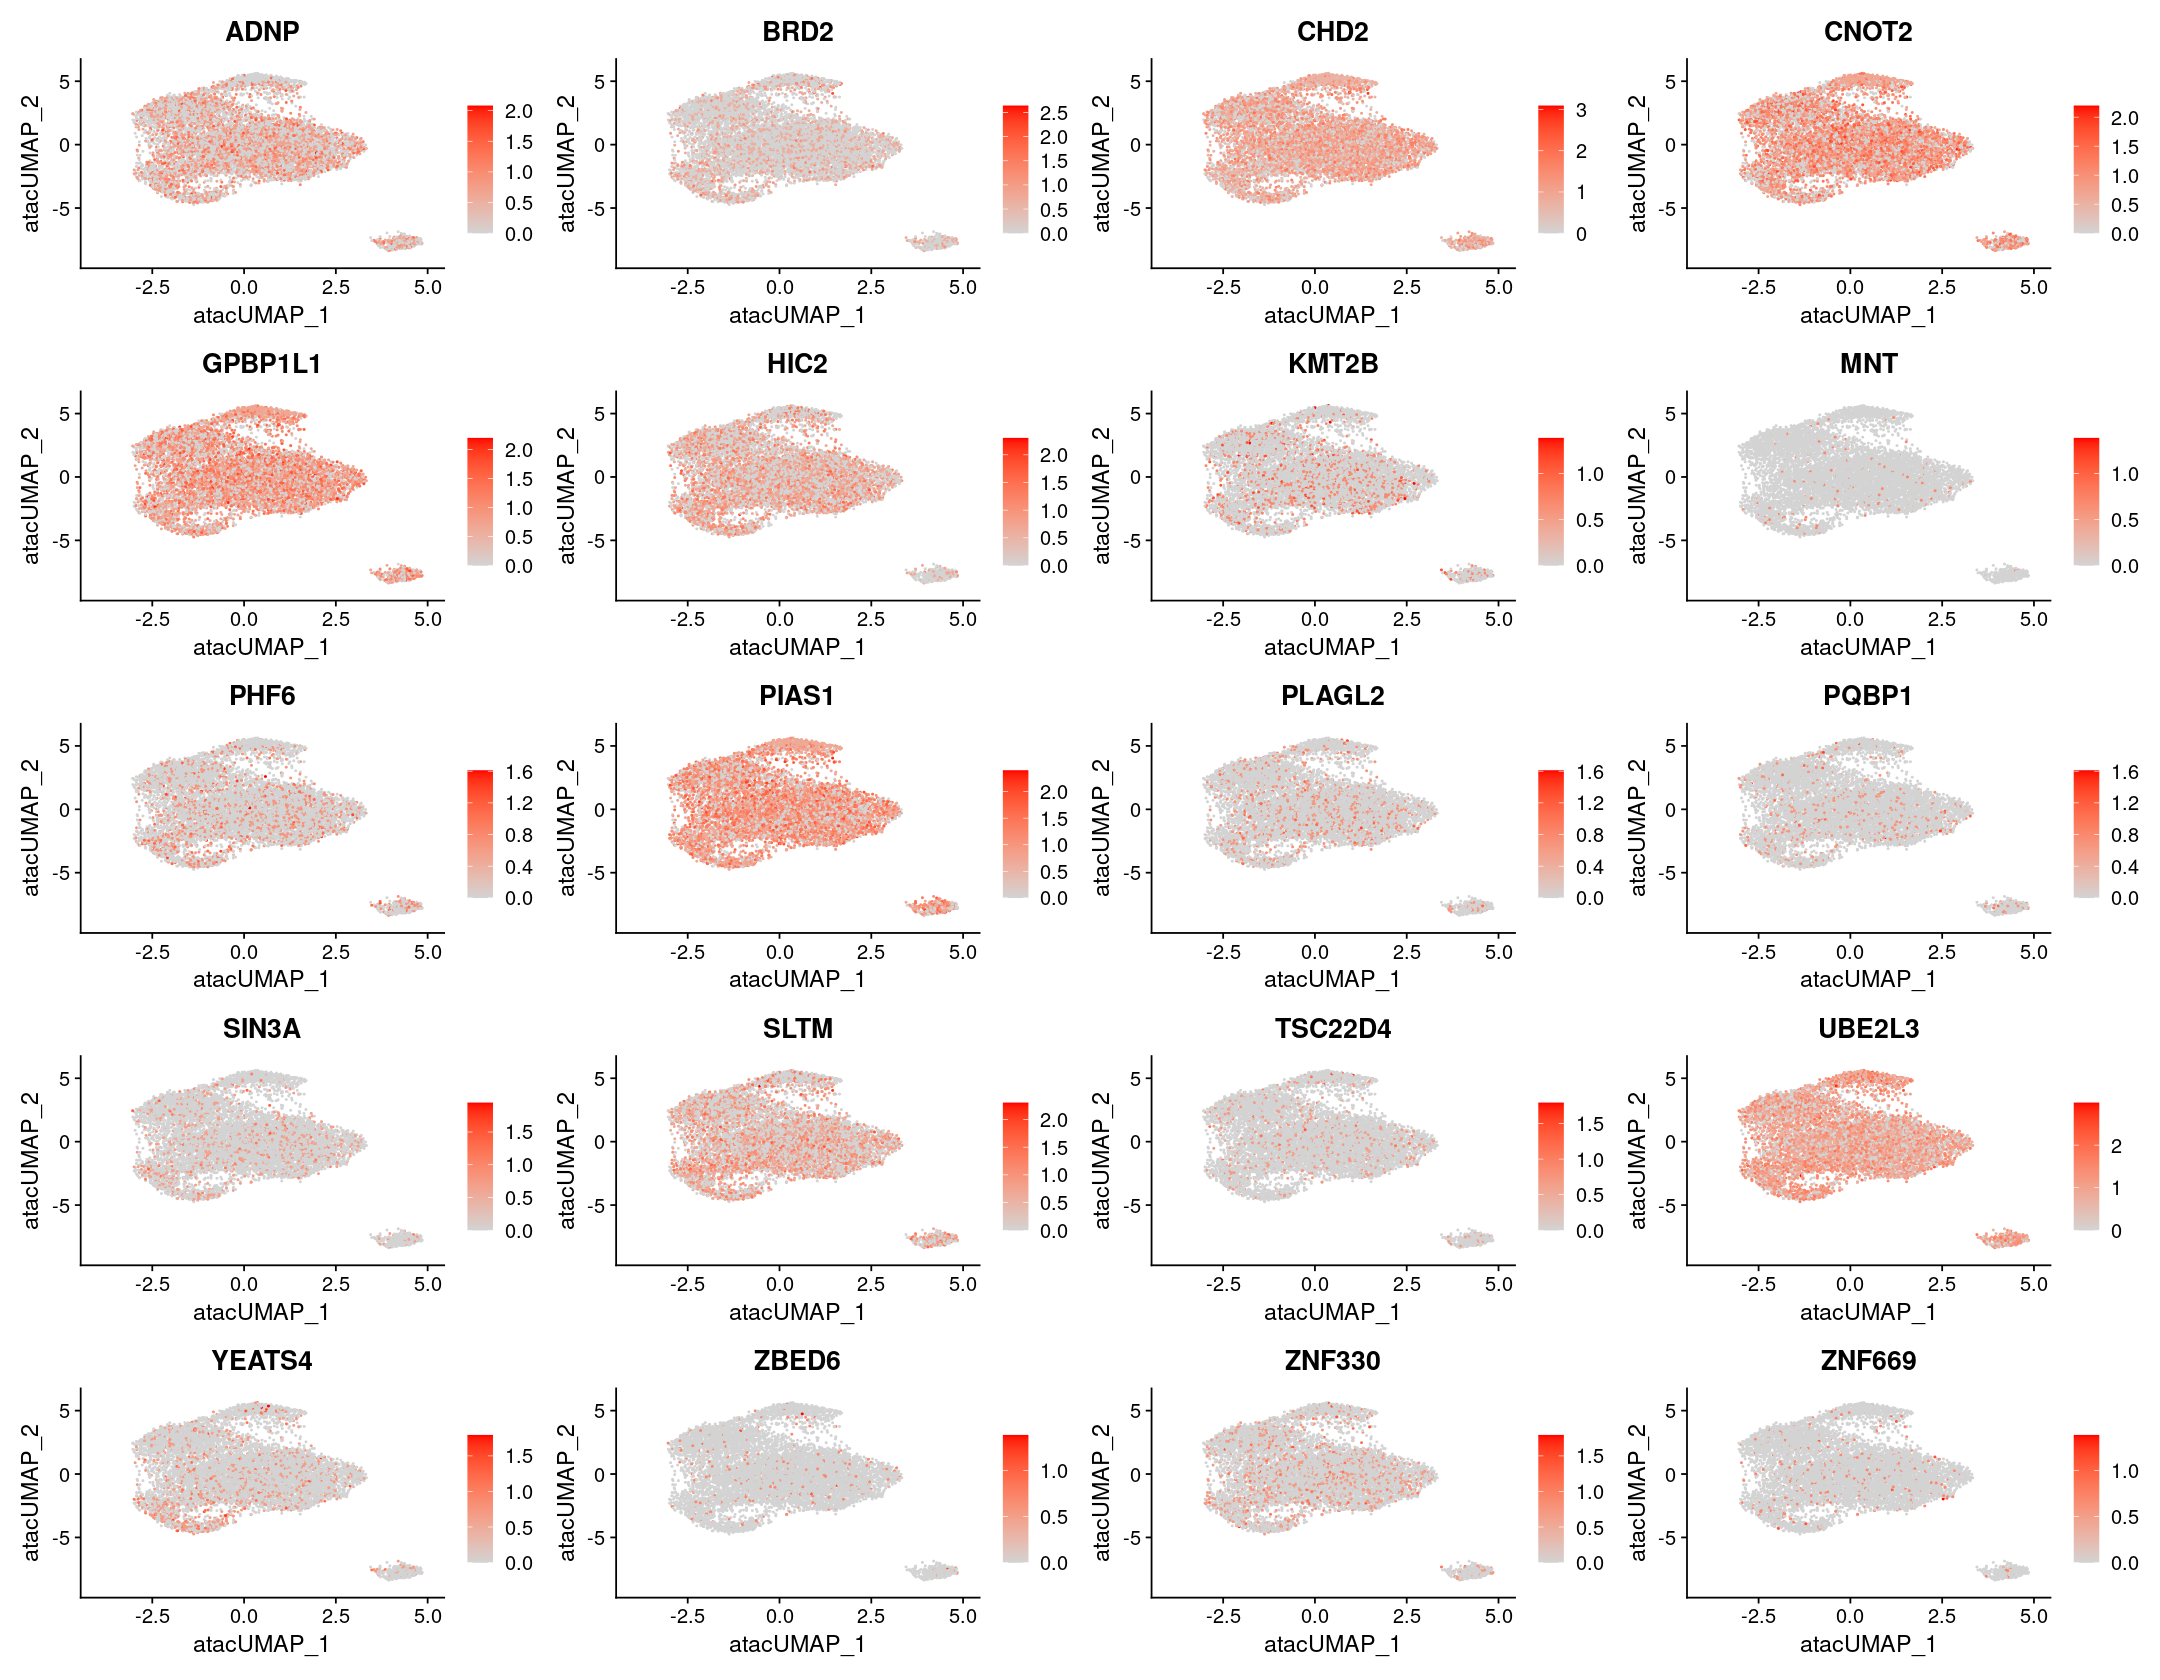

In [31]:
gene_plot <- FeaturePlot(seurat, features = tf.list, reduction = 'umap.atac', cols = c("lightgrey", "red"))
gene_plot 

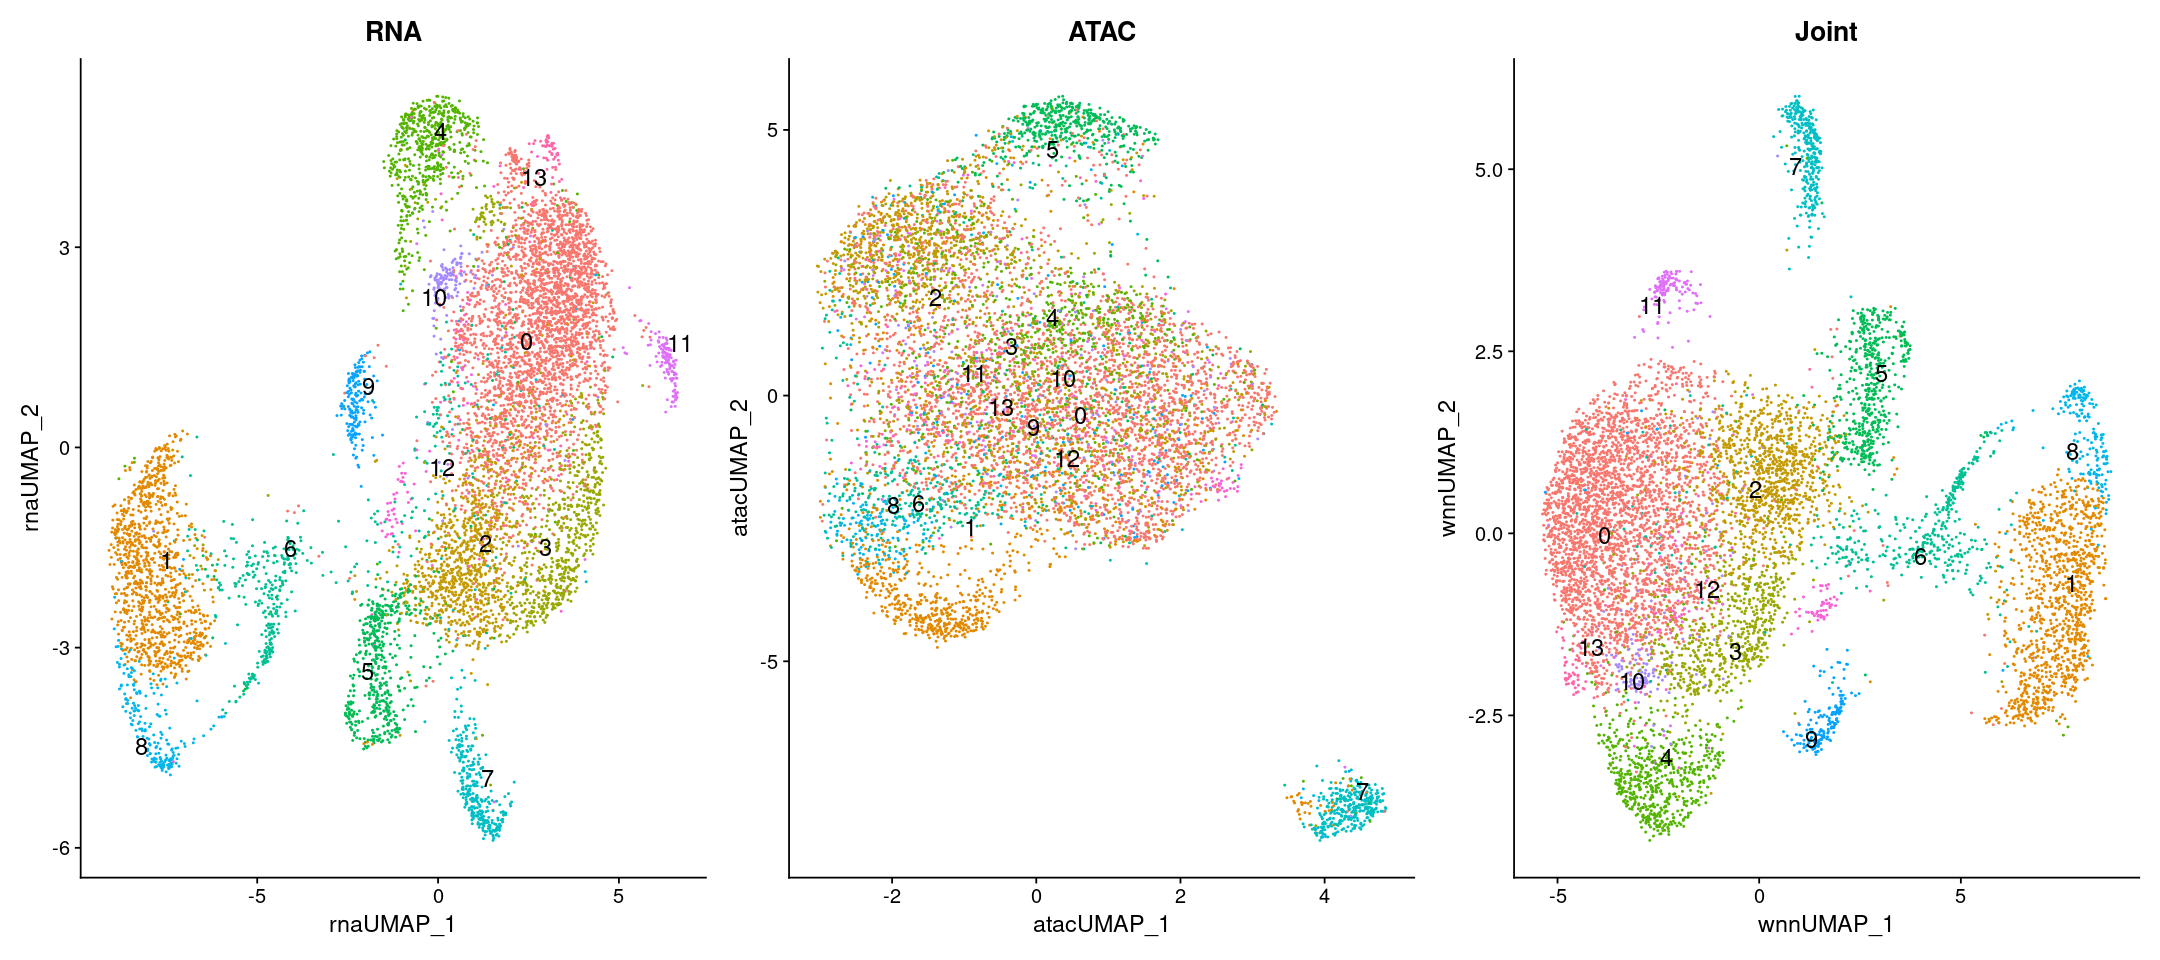

In [32]:
p1 <- DimPlot(seurat, reduction = "umap.rna",  label = TRUE, label.size = 5, repel = TRUE) + ggtitle("RNA")
p2 <- DimPlot(seurat, reduction = "umap.atac", label = TRUE, label.size = 5, repel = TRUE) + ggtitle("ATAC")
p3 <- DimPlot(seurat, reduction = "wnn.umap",  label = TRUE, label.size = 5, repel = TRUE) + ggtitle("Joint")
options(repr.plot.width=18, repr.plot.height=8)
p1 + p2 + p3 & NoLegend() & theme(plot.title = element_text(hjust = 0.5))

In [33]:
# add annotations
# seurat <- RenameIdents(seurat, 'GATA5a' = '13' , 'GATA5b' = '16')
# seurat <- RenameIdents(seurat, 'iPSC' = '5')
# seurat <- RenameIdents(seurat, 'MEOX1' = '10')
# seurat <- RenameIdents(seurat, 'NGN2' = '11')

#seurat$celltype <- Idents(seurat)

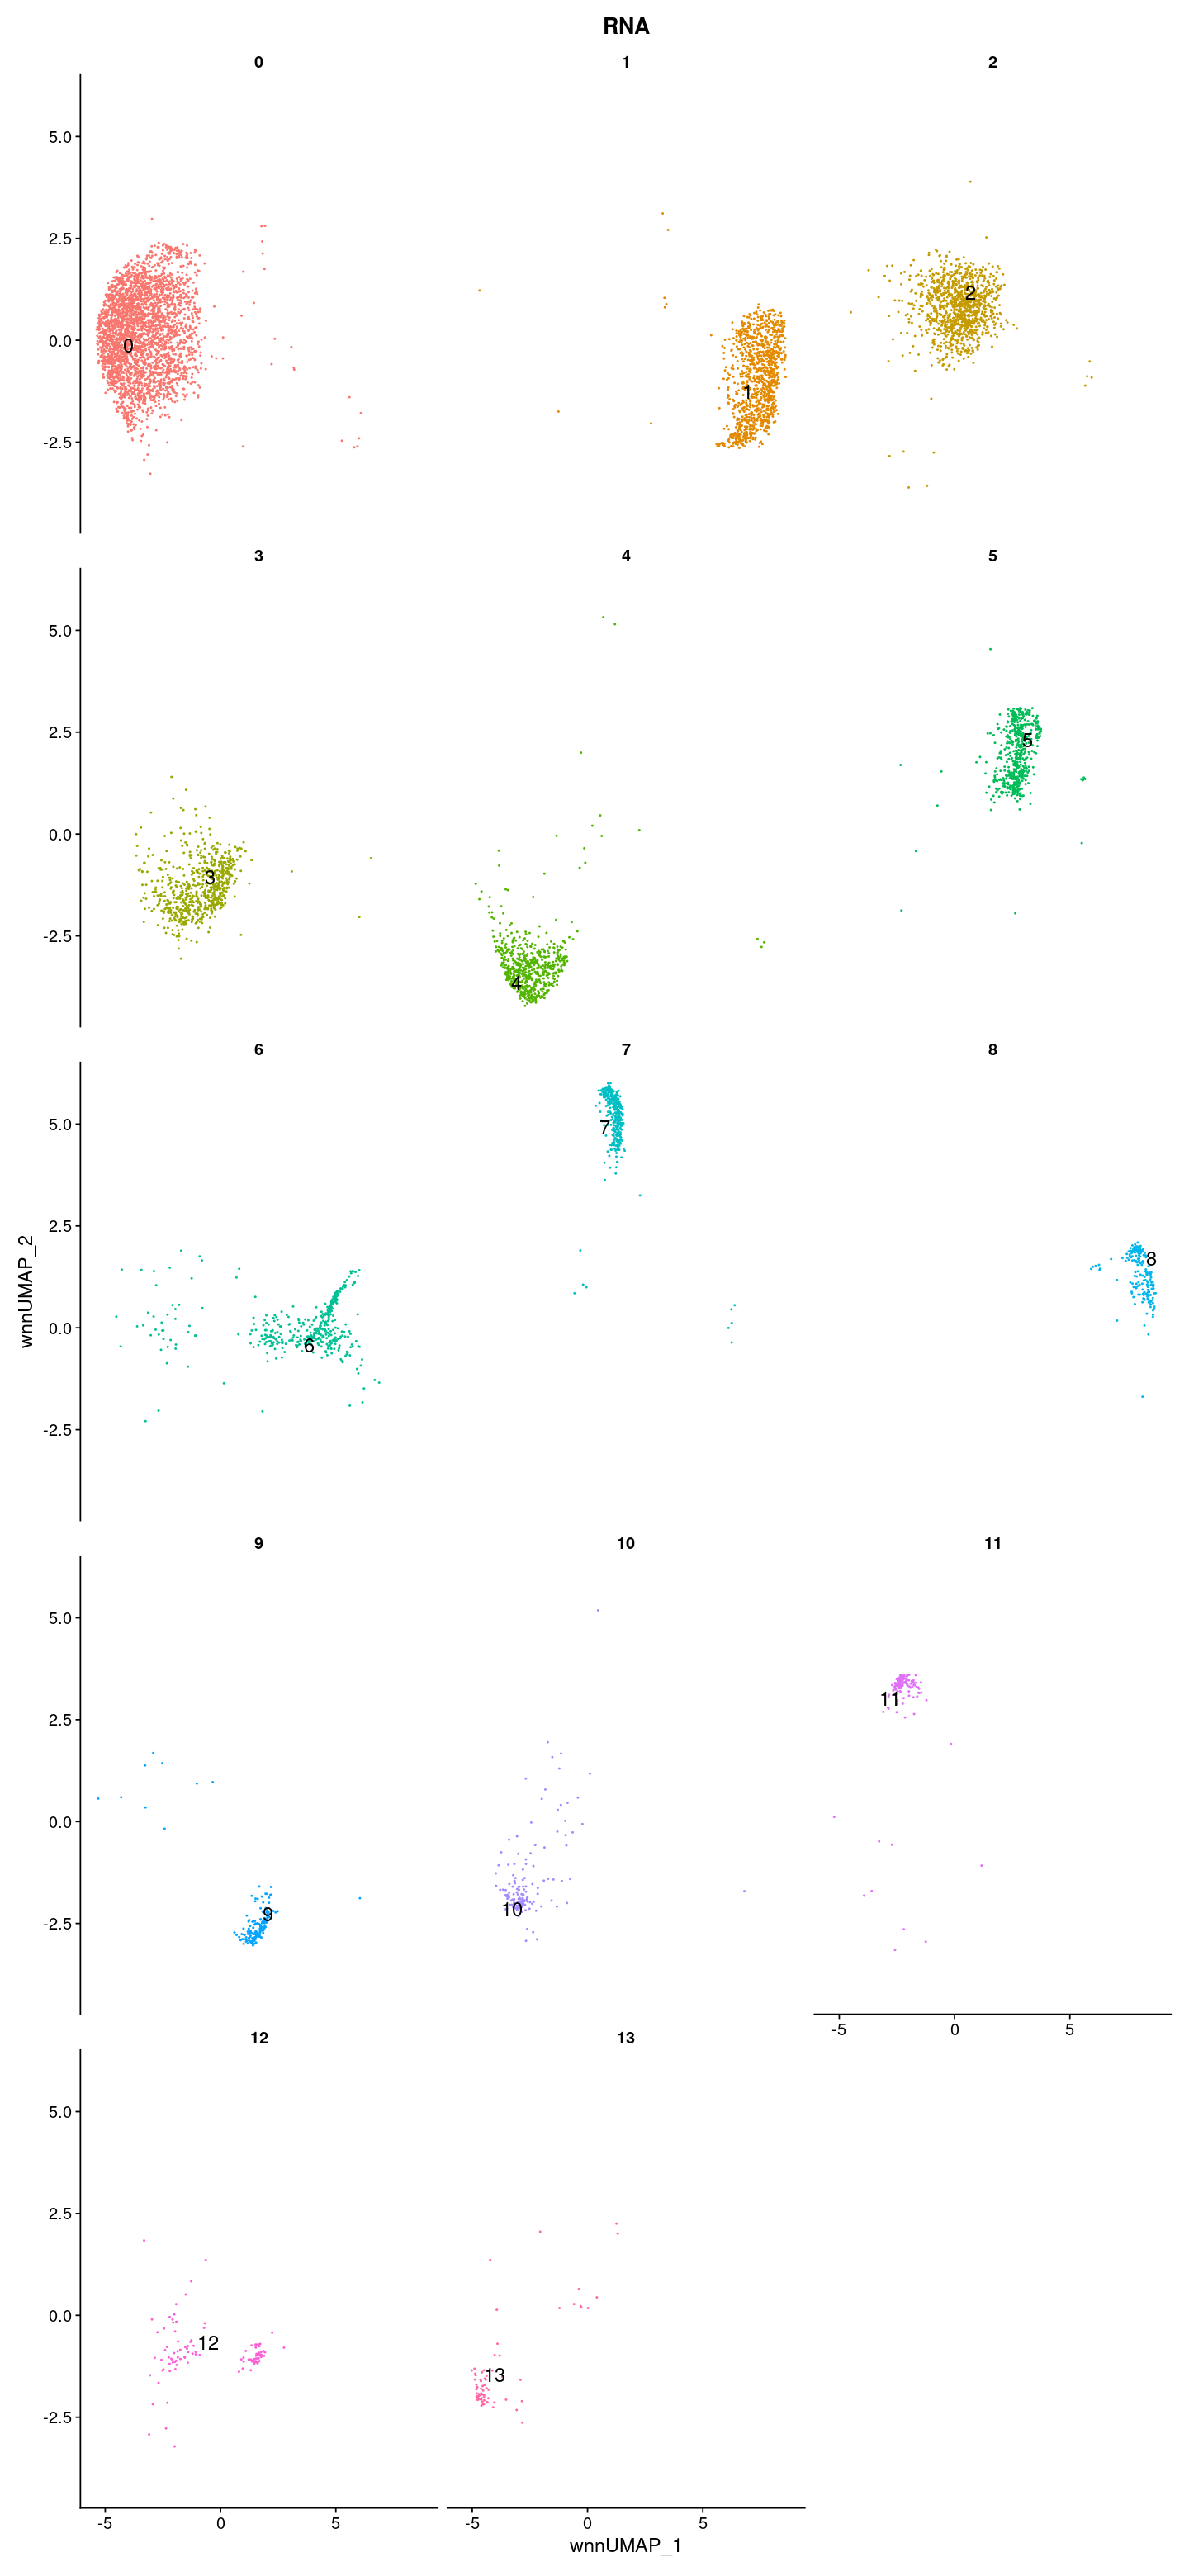

In [34]:
options(repr.plot.width=12, repr.plot.height=26)
p1 <- DimPlot(seurat, reduction = "wnn.umap", ncol = 3, split.by = 'seurat_clusters' , label = TRUE, label.size = 5, repel = TRUE) + ggtitle("RNA")
p1 & NoLegend() & theme(plot.title = element_text(hjust = 0.5))

In [35]:
new_h5_name = sub(".h5seurat", "_ONLY_SINGLETS.h5seurat", h5_name)
SaveH5Seurat(seurat, new_h5_name, overwrite=TRUE, verbose=FALSE)

Warning message:
"Overwriting previous file /data2/kfeng/deeper_guides_dasatinib/secondary/DASA1/seurat/CATATAC_CRISPR-DASA1_ONLY_SINGLETS.h5seurat"


Creating h5Seurat file for version 3.1.5.9900

